# XGboost pipeline v3

In [358]:
import pandas as pd
import geopandas as gpd

**DATA LOADING**

In [359]:
df_b = pd.read_parquet('../data/processed/burglaries.parquet')
df_burglaries = df_b.groupby(['Ward code', 'Month']).size().reset_index(name='Crime count')
display(df_burglaries.head())

df_c = pd.read_parquet('../data/processed/census_lsoa.parquet')
df_census = df_c.groupby('Ward code').sum(numeric_only=True).reset_index() # sum of LSOAs in each ward
display(df_census.head())

df_d = pd.read_parquet('../data/processed/deprivation_lsoa.parquet')
df_deprivation = df_d.groupby('Ward code').mean(numeric_only=True).reset_index() # average of LSOAs in each ward
display(df_deprivation)

df_stops = pd.read_csv('../data/processed/stop_counts_per_ward.csv')
display(df_stops)

# for deprivation, include only the 'Score' columns, and not rank and deciles
df_deprivation_filtered = df_deprivation.loc[:, df_deprivation.columns.str.contains('Score|Ward code')]

df_static = df_census.merge(df_deprivation_filtered, on="Ward code").merge(df_stops[["Ward code", "stop_count"]], on="Ward code")
display(df_static)

# boundary data
gdf_ward_boundaries = gpd.read_file('../data/boundaries/ward boundaries 2024/london_wards_merged.shp')

Ward code      Month  Crime count
0  E05009317 2022-04-01            4
1  E05009317 2022-05-01           16
2  E05009317 2022-06-01            7
3  E05009317 2022-07-01            6
4  E05009317 2022-08-01            5

Ward code  Total population  Under 15 years  15 to 64 years  \
0  E05009317             23708            4456           17884   
1  E05009318             21615            3325           17514   
2  E05009319             19540            3228           15150   
3  E05009320             13708            2396           10173   
4  E05009321             11567            2401            8465   

   65 years and older  Total: All households  One-person household  \
0                1368                 8044.0                2260.0   
1                 776                 9571.0                3491.0   
2                1162                 8401.0                2721.0   
3                1139                 5277.0                1529.0   
4                 701                 4441.0                1418.0   

   One-person household: Aged 66 years and over  One-person household: Other  \
0                                         454.0                       1806.0   
1                                         245.0                       3246.0   
2                                         492.0                       2229.0   
3                                         406.0                       1123.0   
4                                         208.0                       1210.0   

   Single family household  Other household types  \
0                   4283.0                 1501.0   
1                   4708.0                 1372.0   
2                   4398.0                 1282.0   
3                   2656.0                 1092.0   
4                   2326.0                  697.0   

   Detached whole house or bungalow  Semi-detached whole house or bungalow  \
0                              60.0                                  130.0   
1                               0.0                                   75.0   
2                             115.0                                  205.0   
3                              50.0                                  165.0   
4                              45.0                                  105.0   

   Terraced whole house or bungalow  Flat, maisonette or apartment  \
0                             870.0                         7410.0   
1                             335.0                        10925.0   
2                             935.0                         7700.0   
3                            1360.0                         3980.0   
4                             350.0                         4180.0   

   A caravan or other mobile or temporary structure  Total: All dwellings  \
0                                               0.0                  8535   
1                                              80.0                 11490   
2                                               0.0                  8990   
3                                               0.0                  5580   
4                                              20.0                  4725   

   Total: Occupied dwellings  Unoccupied dwellings  
0                       8030                 490.0  
1                       9545                1945.0  
2                       8405                 580.0  
3                       5275                 305.0  
4                       4445                 280.0

Ward code  Index of Multiple Deprivation (IMD) Score  \
0    E05009317                                  29.618149   
1    E05009318                                  18.023071   
2    E05009319                                  28.217091   
3    E05009320                                  26.289714   
4    E05009321                                  34.337286   
..         ...                                        ...   
675  E05014116                                  19.240600   
676  E05014117                                  29.338286   
677  E05014118                                  20.963200   
678  E05014119                                  20.499800   
679  E09000001                                  14.805000   

     Index of Multiple Deprivation (IMD) Rank  \
0                                 8591.484596   
1                                16578.071429   
2                                 9341.909091   
3                                10240.428571   
4                                 6293.285714   
..                                        ...   
675                              15450.200000   
676                               8884.000000   
677                              14518.600000   
678                              15804.800000   
679                              20275.166667   

     Index of Multiple Deprivation (IMD) Decile  Income Score   Income Rank  \
0                                      3.216929      0.202229   7069.749127   
1                                      5.785714      0.109071  16913.357143   
2                                      3.363636      0.178818   9415.454545   
3                                      3.714286      0.170143   9800.571429   
4                                      2.571429      0.252143   4005.000000   
..                                          ...           ...           ...   
675                                    5.000000      0.118000  14961.000000   
676                                    3.142857      0.166000   9948.428571   
677                                    5.000000      0.099800  18307.400000   
678                                    5.200000      0.121800  16304.200000   
679                                    6.666667      0.062667  25280.500000   

     Income Decile  Employment Score  Employment Rank  Employment Decile  ...  \
0         2.800262          0.111058     12027.812847           4.100524  ...   
1         5.642857          0.057786     23493.785714           7.714286  ...   
2         3.090909          0.096455     15163.000000           5.090909  ...   
3         3.571429          0.097000     14078.000000           4.714286  ...   
4         1.714286          0.139286      7853.142857           2.857143  ...   
..             ...               ...              ...                ...  ...   
675       5.200000          0.078200     18283.000000           6.200000  ...   
676       3.428571          0.107857     12572.285714           4.285714  ...   
677       6.200000          0.063800     21093.000000           6.600000  ...   
678       5.600000          0.084000     18486.200000           6.200000  ...   
679       8.000000          0.050833     24839.666667           7.833333  ...   

     Health Deprivation and Disability Decile  Crime Score    Crime Rank  \
0                                    4.300262     0.667665   8068.050580   
1                                    5.857143    -0.327929  21006.857143   
2                                    3.545455     0.667545   7742.181818   
3                                    5.000000     1.017714   4709.000000   
4                                    4.142857     0.837286   6704.142857   
..                                        ...          ...           ...   
675                                  6.400000     0.131000  14636.200000   
676                                  4.285714     0.523857   9047.571429   
677                                  4.800000     0.258600  13397.400000   
6

Ward code                Ward name  stop_count
0    E05009317       Bethnal Green East          30
1    E05009318  Blackwall & Cubitt Town          41
2    E05009319                 Bow East          45
3    E05009320                 Bow West          27
4    E05009321            Bromley North          15
..         ...                      ...         ...
675  E05014116          Streatham Wells          29
676  E05014117                 Vauxhall          32
677  E05014118    Waterloo & South Bank          68
678  E05014119             West Dulwich          25
679  E09000001           City of London         175

[680 rows x 3 columns]

Ward code  Total population  Under 15 years  15 to 64 years  \
0    E05009317             23708            4456           17884   
1    E05009318             21615            3325           17514   
2    E05009319             19540            3228           15150   
3    E05009320             13708            2396           10173   
4    E05009321             11567            2401            8465   
..         ...               ...             ...             ...   
675  E05014116              9589            1568            7112   
676  E05014117             10478            1067            8651   
677  E05014118              8566             816            6897   
678  E05014119              8429            1729            5555   
679  E09000001              8587             580            6797   

     65 years and older  Total: All households  One-person household  \
0                  1368                 8044.0                2260.0   
1                   776                 9571.0                3491.0   
2                  1162                 8401.0                2721.0   
3                  1139                 5277.0                1529.0   
4                   701                 4441.0                1418.0   
..                  ...                    ...                   ...   
675                 909                 4022.0                1173.0   
676                 760                 5056.0                2200.0   
677                 853                 3716.0                1524.0   
678                1145                 3440.0                 988.0   
679                1210                 4915.0                2508.0   

     One-person household: Aged 66 years and over  \
0                                           454.0   
1                                           245.0   
2                                           492.0   
3                                           406.0   
4                                           208.0   
..                                            ...   
675                                         283.0   
676                                         284.0   
677                                         325.0   
678                                         386.0   
679                                         496.0   

     One-person household: Other  Single family household  ...  \
0                         1806.0                   4283.0  ...   
1                         3246.0                   4708.0  ...   
2                         2229.0                   4398.0  ...   
3                         1123.0                   2656.0  ...   
4                         1210.0                   2326.0  ...   
..                           ...                      ...  ...   
675                        890.0                   2228.0  ...   
676                       1916.0                   2069.0  ...   
677                       1199.0                   1576.0  ...   
678                        602.0                   2139.0  ...   
679                       2012.0                   1979.0  ...   

     Unoccupied dwellings  Index of Multiple Deprivation (IMD) Score  \
0                   490.0                                  29.618149   
1                  1945.0                                  18.023071   
2                   580.0                                  28.217091   
3                   305.0                                  26.289714   
4                   280.0                                  34.337286   
..                    ...                                        ...   
675                 290.0                                  19.240600   
676                1560.0                                  29.338286   
677                1385.0                                  20.963200   
678                 200.0                                  20.499800   
679                2410.0                                  14.805000   

     Income Score  Employmen

In [360]:
df_ward_features = (df_burglaries
                    .merge(df_census, on="Ward code")
                    .merge(df_deprivation, on="Ward code")
                    .merge(df_stops[["Ward code", "stop_count"]], on="Ward code", how="left")
                    )

# add normalized crime columns
df_ward_features["Crimes per 1,000 people"] = (df_ward_features["Crime count"] / df_ward_features["Total population"]) * 1000
df_ward_features["Crimes per 1,000 dwellings"] = (df_ward_features["Crime count"] / df_ward_features["Total: All dwellings"]) * 1000
df_ward_features["Crimes per 1,000 households"] = (
    df_ward_features["Crime count"] / df_ward_features["Total: All households"]
) * 1000

# add normalized stops column
df_ward_features['Stops count per 1,000 people'] = (df_ward_features['stop_count'] / df_ward_features['Total population']) * 1000


**EXPLARATORY DATA ANALYSIS**

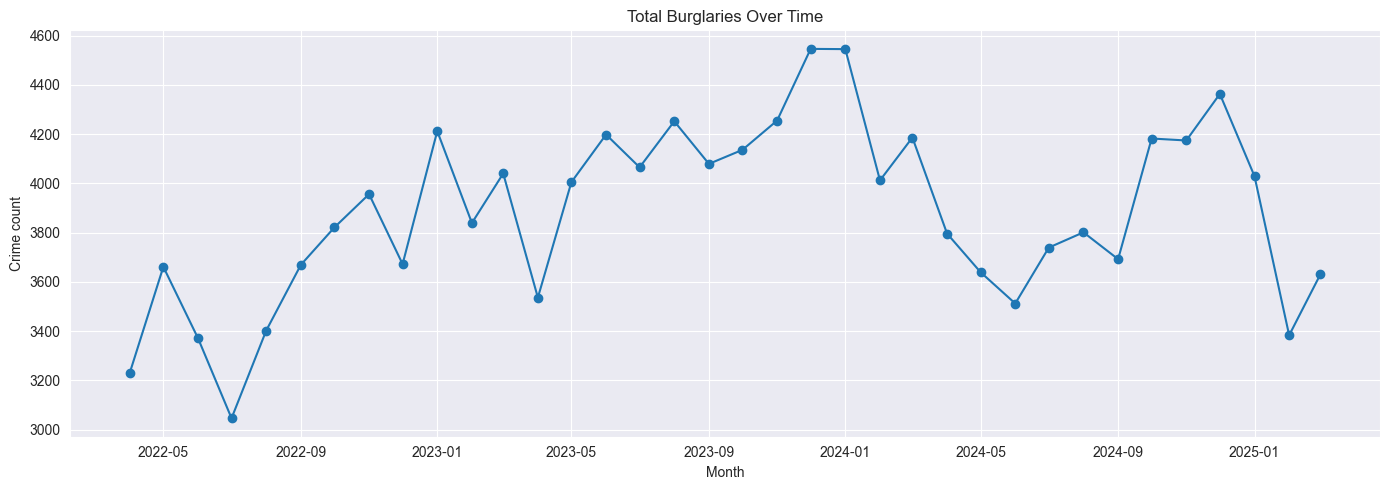

'There seems to be seasonality, although it is rather irregular. Most prominent are the peaks around December/January.'

In [361]:
# TOTAL BURGLARIES OVER TIME

import matplotlib.pyplot as plt

df_burglaries_over_time = df_burglaries.groupby("Month")["Crime count"].sum().reset_index()

# plot
plt.figure(figsize=(14, 5))
plt.plot(df_burglaries_over_time["Month"], df_burglaries_over_time["Crime count"], marker='o')
plt.title("Total Burglaries Over Time")
plt.xlabel("Month")
plt.ylabel("Crime count")
plt.grid(True)
plt.tight_layout()
plt.show()


'There seems to be seasonality, although it is rather irregular. Most prominent are the peaks around December/January.'

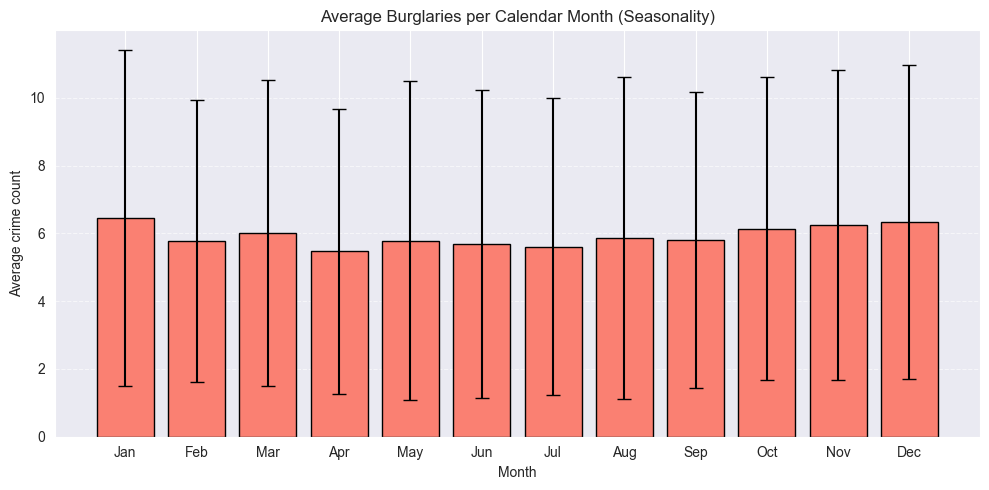

In [362]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract month number and name
df_burglaries["Month_num"] = df_burglaries["Month"].dt.month
df_burglaries["Month_name"] = df_burglaries["Month"].dt.strftime('%b')

# Group by month name and calculate mean and standard deviation
monthly_stats = (
    df_burglaries.groupby("Month_name")["Crime count"]
    .agg(['mean', 'std'])
    .reindex(["Jan", "Feb", "Mar", "Apr", "May", "Jun",
              "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
)

# Plot
plt.figure(figsize=(10, 5))
plt.bar(
    monthly_stats.index,
    monthly_stats["mean"],
    yerr=monthly_stats["std"],
    capsize=5,
    color="salmon",
    edgecolor="black"
)
plt.title("Average Burglaries per Calendar Month (Seasonality)")
plt.ylabel("Average crime count")
plt.xlabel("Month")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


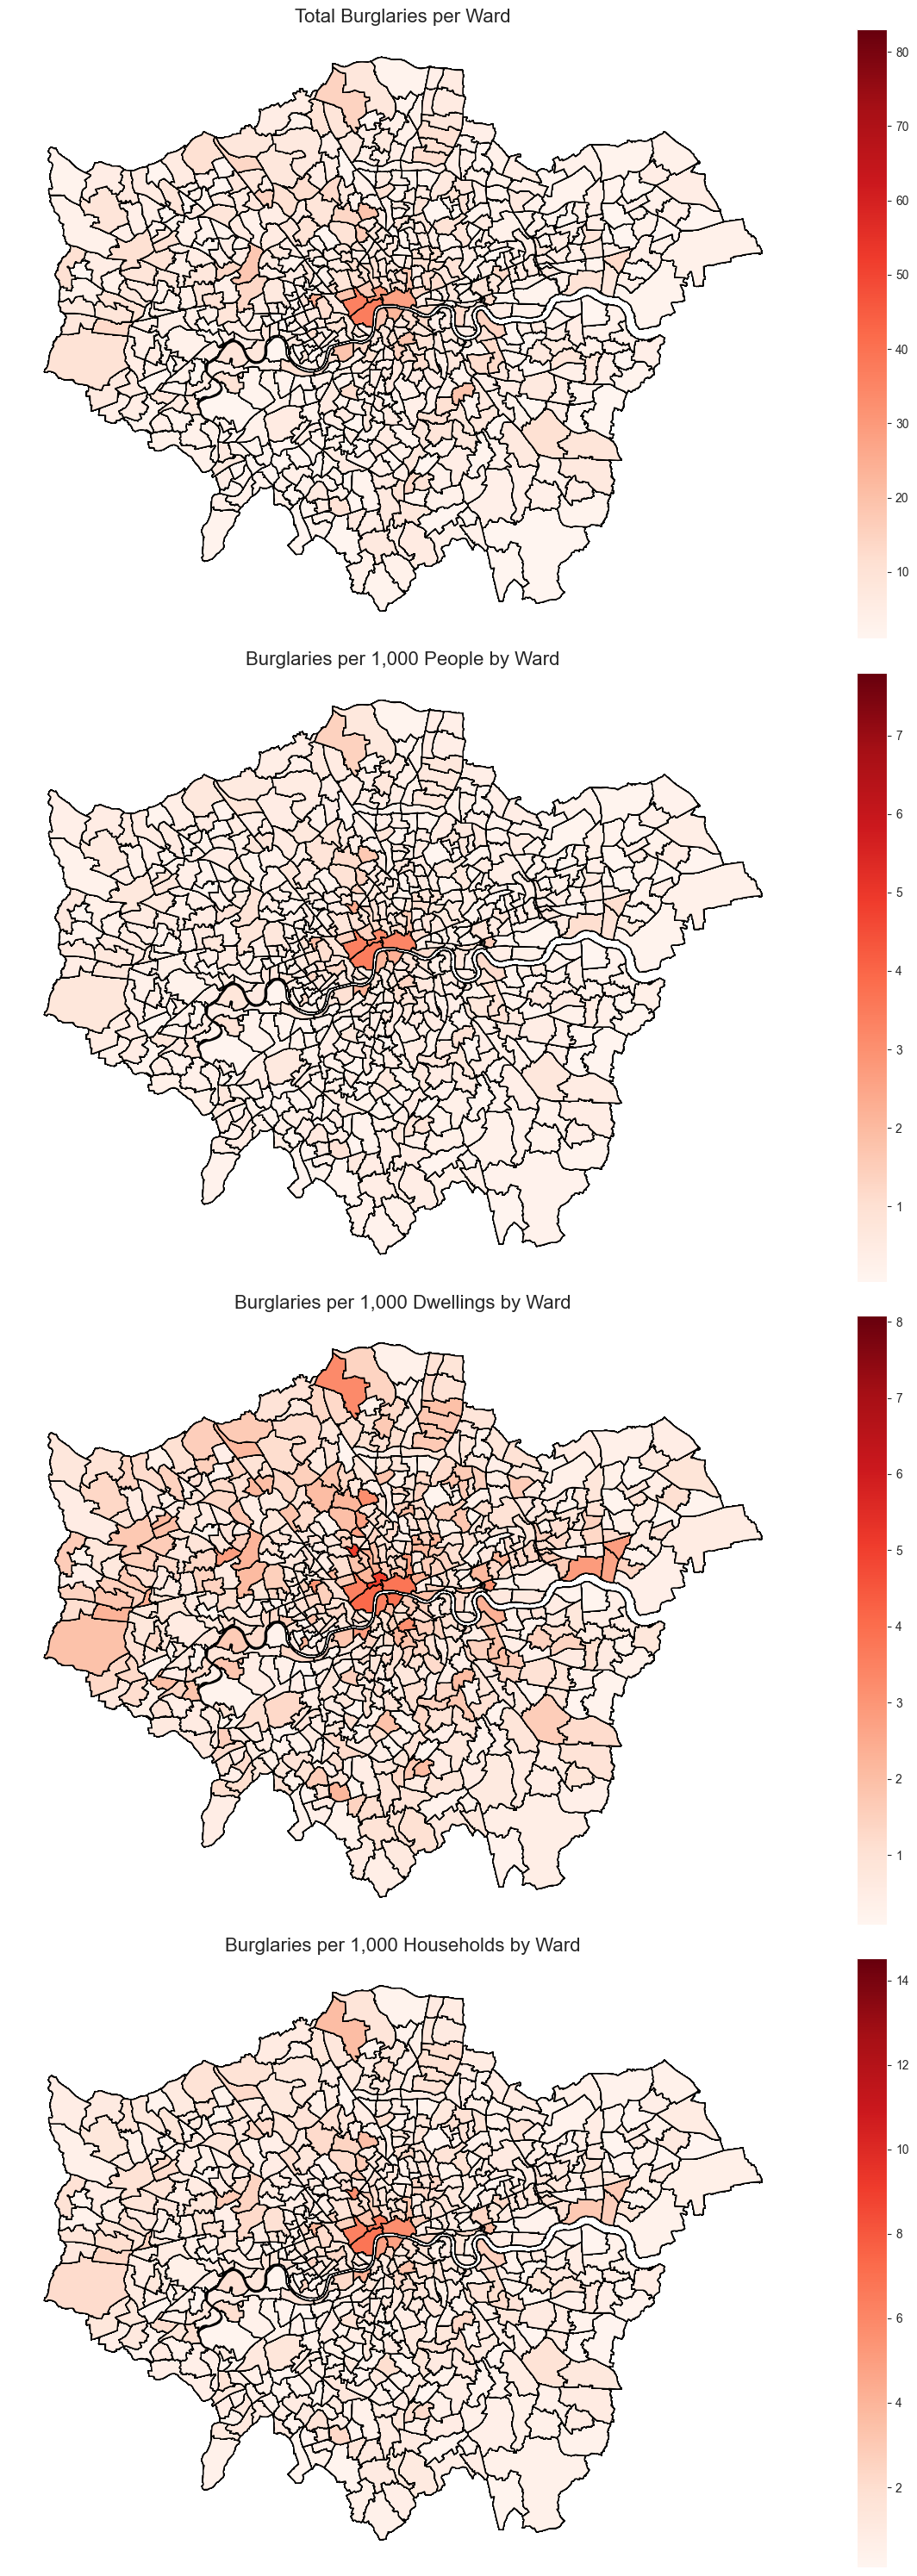

In [363]:
# (NORMALIZED) CRIME RATES PER WARD 

# Merge with GeoDataFrame
gdf_crime_rates = gdf_ward_boundaries.merge(df_ward_features, left_on='WD24CD', right_on="Ward code", how="left")

# Create figure and axes
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(14, 30))

# Plot 1: Total Crimes
gdf_crime_rates.plot(
    column="Crime count", ax=axes[0], legend=True,
    cmap="Reds", edgecolor="black"
)
axes[0].set_title("Total Burglaries per Ward", fontsize=16)
axes[0].axis("off")

# Plot 2: Crimes per 1,000 People
gdf_crime_rates.plot(
    column="Crimes per 1,000 people", ax=axes[1], legend=True,
    cmap="Reds", edgecolor="black"
)
axes[1].set_title("Burglaries per 1,000 People by Ward", fontsize=16)
axes[1].axis("off")

# Plot 3: Crimes per 1,000 dwellings
gdf_crime_rates.plot(
    column="Crimes per 1,000 dwellings", ax=axes[2], legend=True,
    cmap="Reds", edgecolor="black"
)
axes[2].set_title("Burglaries per 1,000 Dwellings by Ward", fontsize=16)
axes[2].axis("off")

# Plot 4: Crimes per 1,000 households
gdf_crime_rates.plot(
    column="Crimes per 1,000 households", ax=axes[3], legend=True,
    cmap="Reds", edgecolor="black"
)
axes[3].set_title("Burglaries per 1,000 Households by Ward", fontsize=16)
axes[3].axis("off")

# Adjust layout
plt.tight_layout()
plt.show()



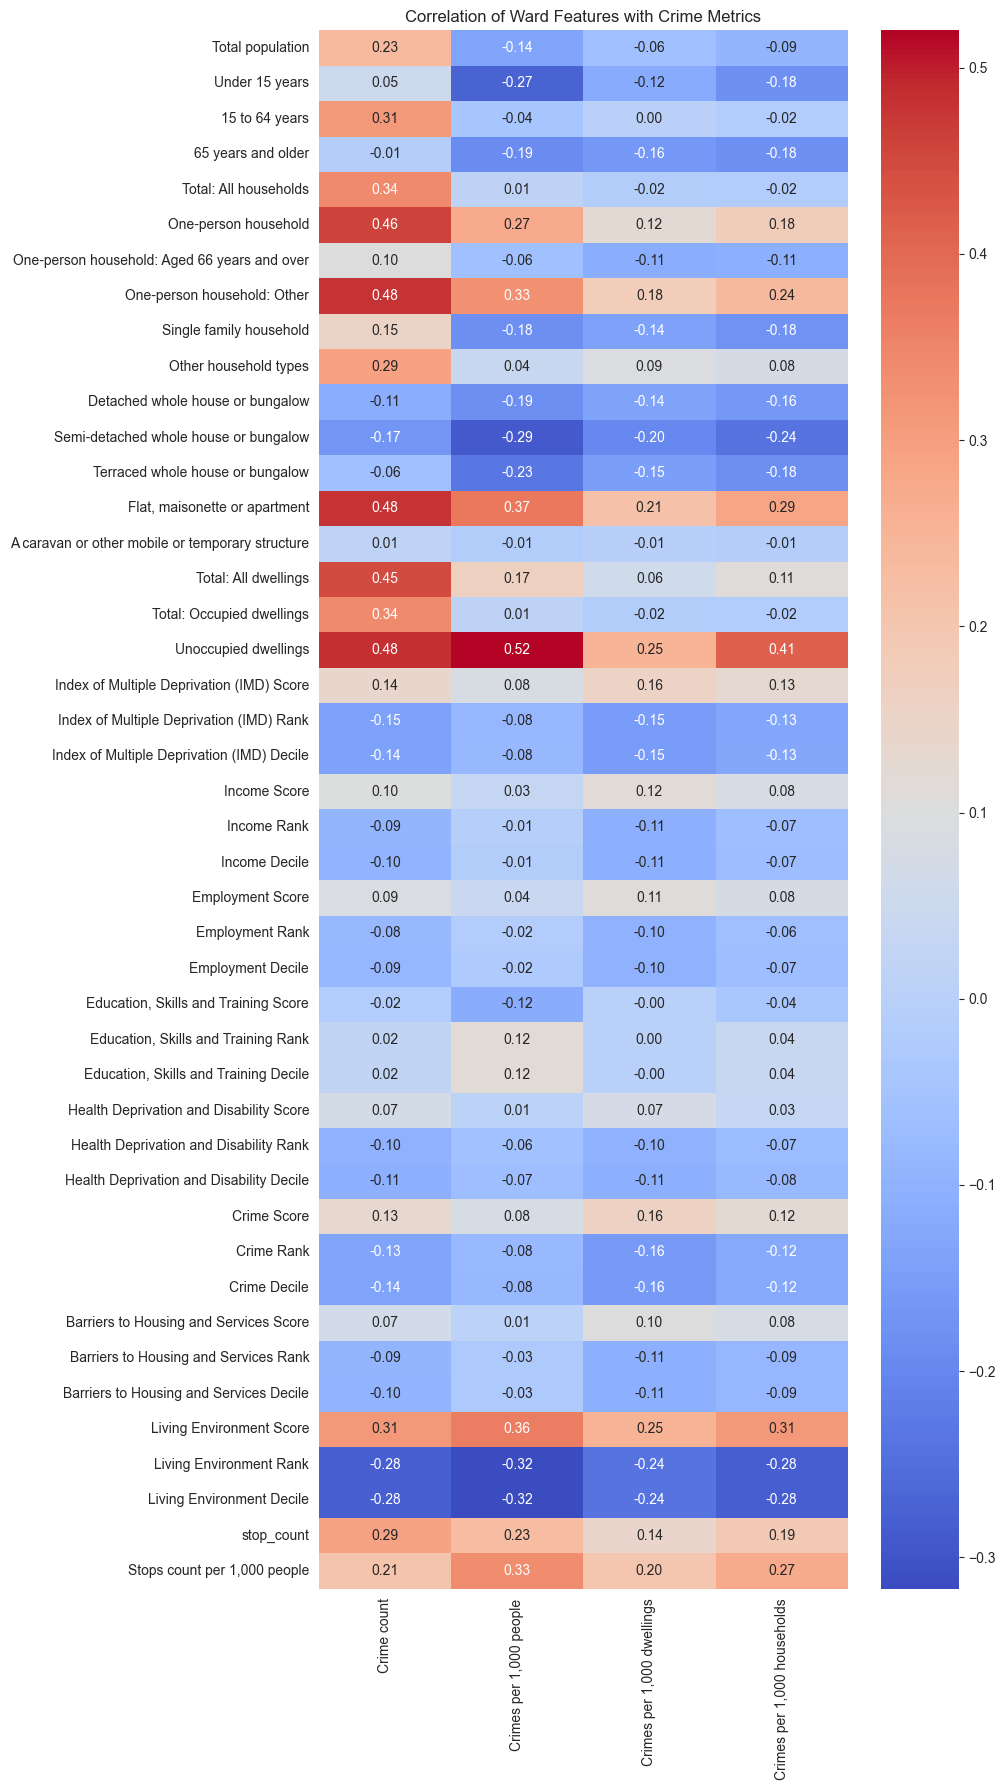

In [364]:
# CORRELATION MATRIX
import seaborn as sns

# Select only numeric columns
numeric_data = df_ward_features.select_dtypes(include="number")

# Compute correlation matrix
corr_matrix = numeric_data.corr()

# Focus only on correlations with crime metrics
target_vars = ["Crime count", "Crimes per 1,000 people", "Crimes per 1,000 dwellings", "Crimes per 1,000 households"]
crime_corr = corr_matrix[target_vars].drop(index=target_vars)

# Plot heatmap
plt.figure(figsize=(10, 18))
sns.heatmap(crime_corr, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation of Ward Features with Crime Metrics")
plt.tight_layout()
plt.show()


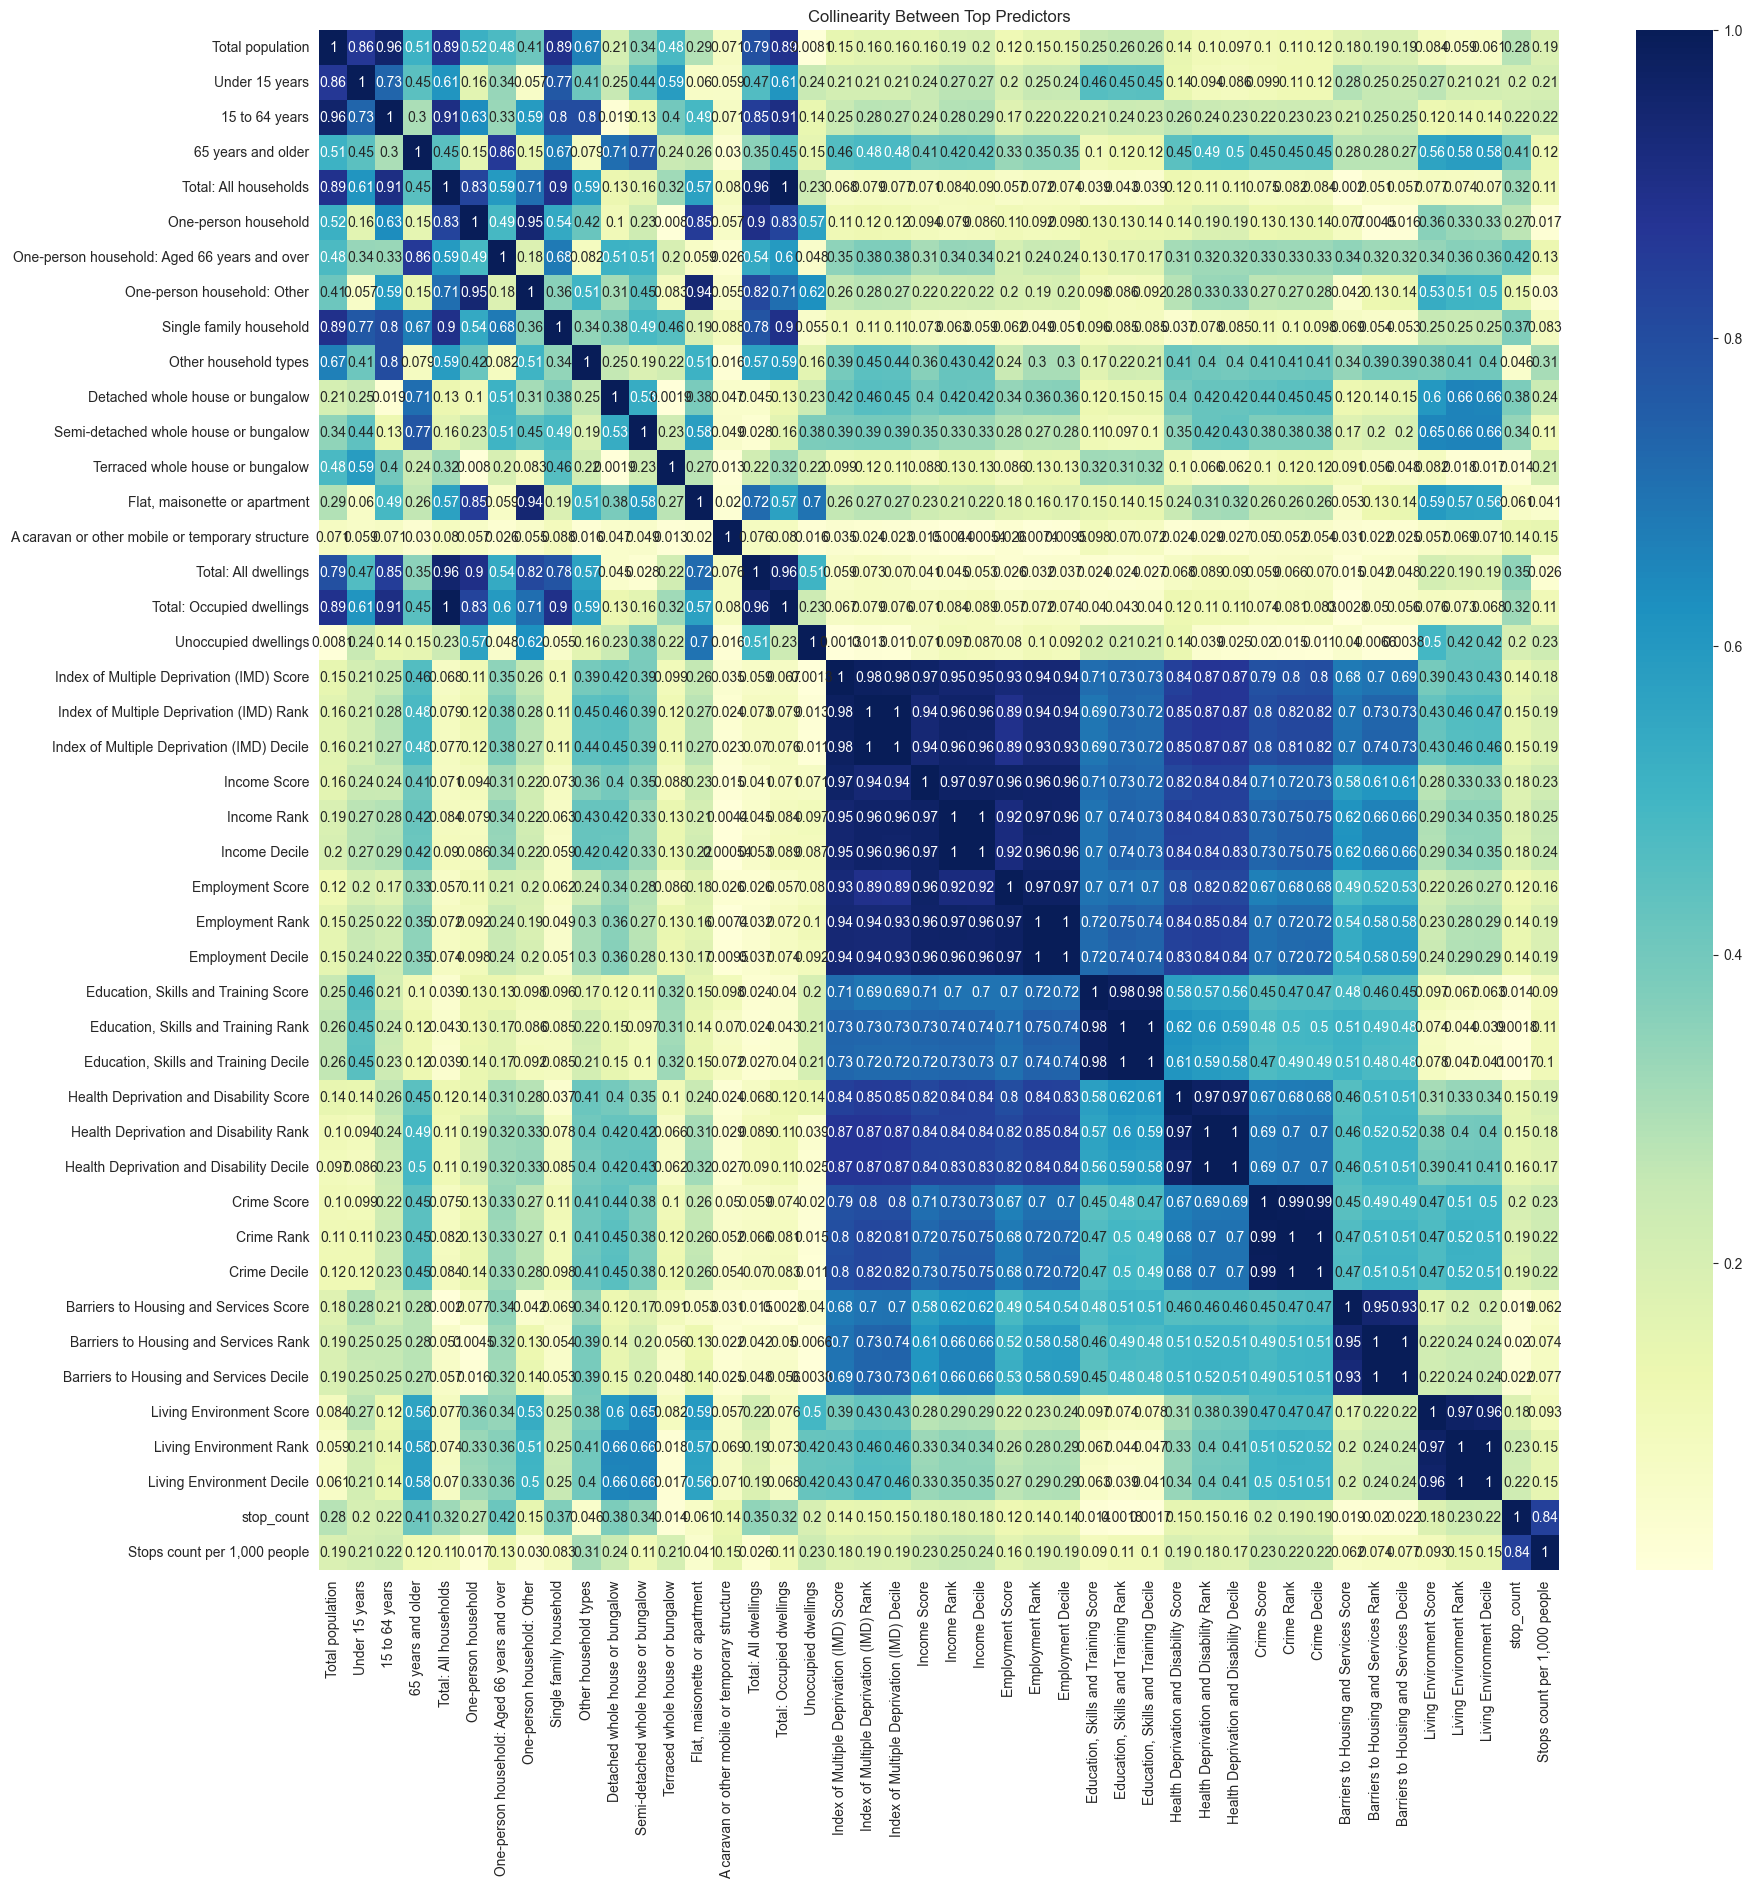

In [365]:
# CORRELATION BETWEEN ALL PREDICTORS
plt.figure(figsize=(20, 20))
# Compute correlation between predictors only
feature_corr = numeric_data.drop(columns=target_vars).corr().abs()

# 3. Drop redundant features (manually or programmatically)
sns.heatmap(feature_corr, annot=True, cmap='YlGnBu')
plt.title("Collinearity Between Top Predictors")
plt.show()



In [366]:
# IDENTIFY ALL GROUPS OF HIGH MULTICOLLINEARITY >95 PERCENT

import numpy as np

# Get the absolute correlation matrix of predictors only
corr_matrix = numeric_data.drop(columns=target_vars).corr().abs()

# Track visited columns to avoid duplicate groups
visited = set()
perfect_corr_groups = []

for col in corr_matrix.columns:
    if col in visited:
        continue
    # Find all columns perfectly correlated with this one (excluding itself)
    perfect_group = corr_matrix.columns[(corr_matrix[col] > 0.95) & (corr_matrix.index != col)].tolist()
    if perfect_group:
        perfect_group.append(col)
        perfect_group = sorted(set(perfect_group))
        perfect_corr_groups.append(perfect_group)
        visited.update(perfect_group)

# Print all perfect correlation groups
print("Highly collinear feature groups (correlation > 94):\n")
for i, group in enumerate(perfect_corr_groups, 1):
    print(f"Group {i}: {group}")


Highly collinear feature groups (correlation > 94):

Group 1: ['15 to 64 years', 'Total population']
Group 2: ['Total: All dwellings', 'Total: All households', 'Total: Occupied dwellings']
Group 3: ['Income Score', 'Index of Multiple Deprivation (IMD) Decile', 'Index of Multiple Deprivation (IMD) Rank', 'Index of Multiple Deprivation (IMD) Score']
Group 4: ['Employment Decile', 'Employment Rank', 'Income Decile', 'Income Rank', 'Income Score', 'Index of Multiple Deprivation (IMD) Decile', 'Index of Multiple Deprivation (IMD) Rank']
Group 5: ['Employment Decile', 'Employment Rank', 'Employment Score', 'Income Score']
Group 6: ['Education, Skills and Training Decile', 'Education, Skills and Training Rank', 'Education, Skills and Training Score']
Group 7: ['Health Deprivation and Disability Decile', 'Health Deprivation and Disability Rank', 'Health Deprivation and Disability Score']
Group 8: ['Crime Decile', 'Crime Rank', 'Crime Score']
Group 9: ['Barriers to Housing and Services Decile',

In [367]:
# REMOVE THE CORRELATED FEATURES (based on pipeline v1)
selected_features = list(df_deprivation_filtered.columns) + ['Under 15 years', '15 to 64 years', '65 years and older', 'One-person household', 'One-person household: Aged 66 years and over', 'One-person household: Other', 'Single family household', 'Other household types', 'Detached whole house or bungalow', 'Semi-detached whole house or bungalow', 'Terraced whole house or bungalow', 'Flat, maisonette or apartment', 'A caravan or other mobile or temporary structure', 'Total: All dwellings', 'Unoccupied dwellings', 'stop_count']
df_static_selected = df_static[selected_features]
df_static_selected

Ward code  Index of Multiple Deprivation (IMD) Score  Income Score  \
0    E05009317                                  29.618149      0.202229   
1    E05009318                                  18.023071      0.109071   
2    E05009319                                  28.217091      0.178818   
3    E05009320                                  26.289714      0.170143   
4    E05009321                                  34.337286      0.252143   
..         ...                                        ...           ...   
675  E05014116                                  19.240600      0.118000   
676  E05014117                                  29.338286      0.166000   
677  E05014118                                  20.963200      0.099800   
678  E05014119                                  20.499800      0.121800   
679  E09000001                                  14.805000      0.062667   

     Employment Score  Education, Skills and Training Score  \
0            0.111058                             18.296646   
1            0.057786                             11.314714   
2            0.096455                             16.242182   
3            0.097000                             14.066429   
4            0.139286                             21.247429   
..                ...                                   ...   
675          0.078200                              6.023000   
676          0.107857                              7.561143   
677          0.063800                             10.141800   
678          0.084000                              7.038800   
679          0.050833                              5.363500   

     Health Deprivation and Disability Score  Crime Score  \
0                                   0.238489     0.667665   
1                                  -0.059000    -0.327929   
2                                   0.445455     0.667545   
3                                   0.053714     1.017714   
4                                   0.295000     0.837286   
..                                       ...          ...   
675                                -0.225000     0.131000   
676                                 0.329429     0.523857   
677                                 0.104600     0.258600   
678                                -0.232800     0.502600   
679                                -0.670500    -1.660833   

     Barriers to Housing and Services Score  Living Environment Score  \
0                                 29.623605                 36.876296   
1                                 31.674429                 35.877000   
2                                 31.129636                 36.264818   
3                                 26.295000                 34.832857   
4                                 30.805286                 29.484000   
..                                      ...                       ...   
675                               26.793600                 41.952800   
676                               32.303143                 55.116714   
677                               29.860800                 52.309000   
678                               26.530800                 40.291600   
679                               36.271333                 40.370167   

     Under 15 years  ...  Single family household  Other household types  \
0              4456  ...                   4283.0                 1501.0   
1              3325  ...                   4708.0                 1372.0   
2              3228  ...                   4398.0                 1282.0   
3              2396  ...                   2656.0                 1092.0   
4              2401  ...                   2326.0                  697.0   
..              ...  ...                      ...                    ...   
675            1568  ...                   2228.0                  621.0   
676            1067  ...                   2069.0                  787.0   
677             816  ...                   1576.0    

**EXPLORATION FEATURE ENGINEERING** 

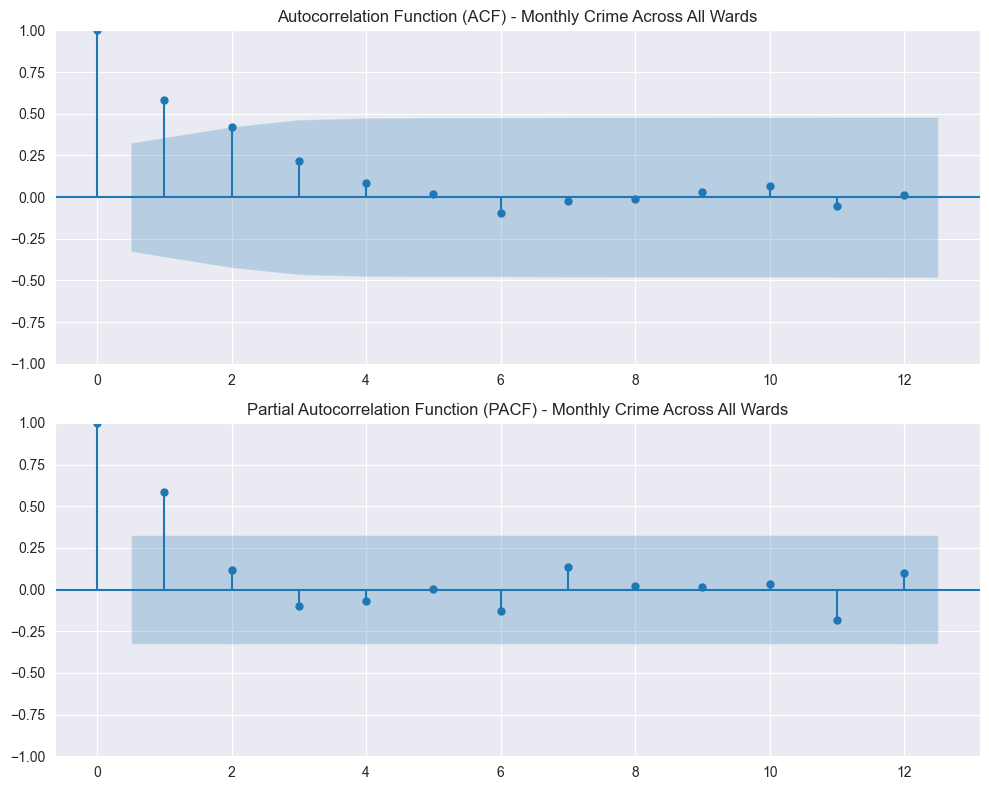

In [368]:
# VISUALIZE LAGS

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# aggregate globally (sum over wards for each year-month)
burglaries_ts = df_burglaries.groupby("Month")["Crime count"].sum().sort_index()

# ACF and PACF for global monthly series
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

plot_acf(burglaries_ts, lags=12, ax=ax[0])
ax[0].set_title("Autocorrelation Function (ACF) - Monthly Crime Across All Wards")

plot_pacf(burglaries_ts, lags=12, ax=ax[1], method="ywm")
ax[1].set_title("Partial Autocorrelation Function (PACF) - Monthly Crime Across All Wards")

plt.tight_layout()
plt.show()



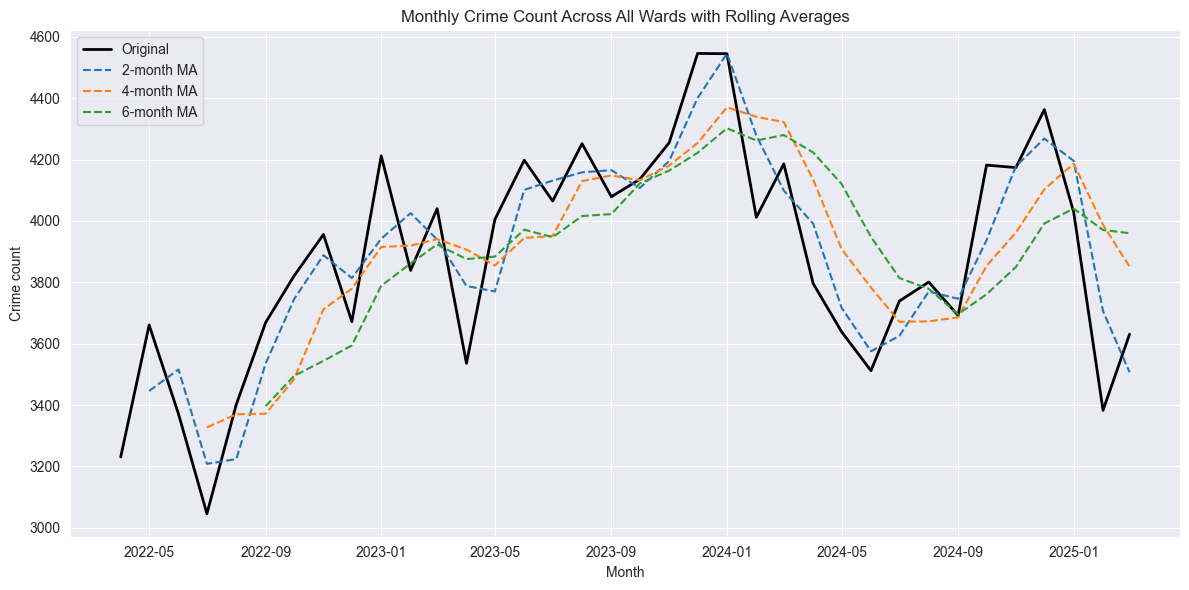

'We already do not have a lot of data, so we should not have a large window for moving average (if we include it at all). I think I can maybe try with moving average up to 6 for now.'

In [369]:
# VISUALIZE ROLLING AVERAGES

# Rolling averages
rolling_2 = burglaries_ts.rolling(window=2).mean()
rolling_4 = burglaries_ts.rolling(window=4).mean()
rolling_6 = burglaries_ts.rolling(window=6).mean()

# Plot all
plt.figure(figsize=(12, 6))
plt.plot(burglaries_ts, label="Original", color="black", linewidth=2)
plt.plot(rolling_2, label="2-month MA", linestyle="--")
plt.plot(rolling_4, label="4-month MA", linestyle="--")
plt.plot(rolling_6, label="6-month MA", linestyle="--")

plt.title("Monthly Crime Count Across All Wards with Rolling Averages")
plt.xlabel("Month")
plt.ylabel("Crime count")
plt.legend()
plt.tight_layout()
plt.show()

'We already do not have a lot of data, so we should not have a large window for moving average (if we include it at all). I think I can maybe try with moving average up to 6 for now.'


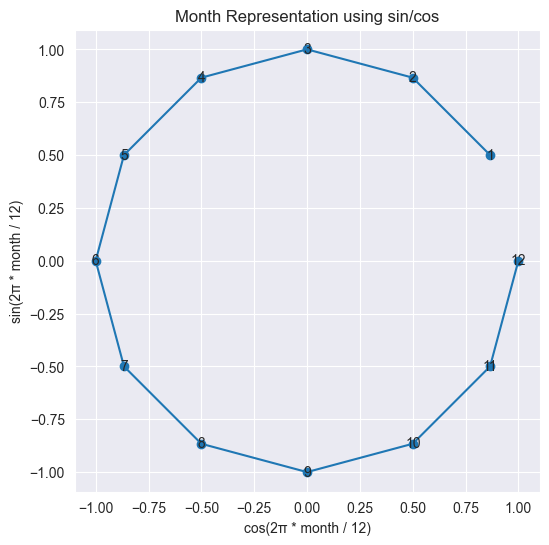

In [370]:
# MONTH REPRESENTATION USING SIN/COS. ALTERNATIVE IS TO ENCODE EACH MONTH AS CATEGORICAL (which I will also experiment with, and see which has higher performance. 
months = np.arange(1, 13)
month_sin = np.sin(2 * np.pi * months / 12)
month_cos = np.cos(2 * np.pi * months / 12)

plt.figure(figsize=(6, 6))
plt.plot(month_cos, month_sin, marker='o')
for i, m in enumerate(months, 1):
    plt.text(month_cos[i-1], month_sin[i-1], str(m), ha='center', va='center')
plt.title("Month Representation using sin/cos")
plt.xlabel("cos(2π * month / 12)")
plt.ylabel("sin(2π * month / 12)")
plt.grid(True)
plt.axis("equal")
plt.show()



In [371]:
# CHECK STATIONARITY: WHETHER TO DIFFERENCE

# Apply Augmented Dickey-Fuller test
adf_result = adfuller(burglaries_ts)

# Display results
print("ADF Statistic:", round(adf_result[0], 4))
print("p-value:", round(adf_result[1], 4))
for key, value in adf_result[4].items():
    print(f"Critical Value ({key}): {round(value, 4)}")

if adf_result[1] < 0.05:
    print("\nThe time series is likely stationary (p < 0.05).")
else:
    print("\nThe time series is likely non-stationary (p ≥ 0.05).")
    
'Based on this, I do not think including first difference is necessary.'


ADF Statistic: -3.1191
p-value: 0.0252
Critical Value (1%): -3.6327
Critical Value (5%): -2.9485
Critical Value (10%): -2.613

The time series is likely stationary (p < 0.05).


'Based on this, I do not think including first difference is necessary.'

**FEATURE ENGINEERING**

In [372]:
import pandas as pd
import numpy as np

def create_features(df_burglaries, df_static, max_horizon=3, lags=[1, 2, 3], rolling_windows=[2, 4, 6]):
    """
    Returns a dictionary with DataFrames of features and forecast targets for:
    - Forecast horizons 1 to max_horizon (i.e., t+1 to t+max_horizon)
    
    Assumes input has columns: ['Month', 'Ward code', 'Crime count']
    Missing months per ward are filled with 0s to ensure valid lag and rolling features.
    """
    df = df_burglaries.copy()
    
    # Ensure datetime and sort
    df['Month'] = pd.to_datetime(df['Month'])
    df = df.sort_values(['Ward code', 'Month'])

    # Create a complete monthly date range covering all data
    all_months = pd.date_range(start=df['Month'].min(), end=df['Month'].max(), freq='MS')

    features = []
    for ward, group in df.groupby('Ward code'):
        group = group.set_index('Month').sort_index()
        group = group.reindex(all_months, fill_value=0)
        group['Ward code'] = ward

        # Lag features
        for lag in lags:
            group[f'lag_{lag}'] = group['Crime count'].shift(lag)

        # Rolling means (shifted to avoid leakage)
        for window in rolling_windows:
            group[f'roll_mean_{window}'] = group['Crime count'].shift(1).rolling(window=window).mean()

        features.append(group.reset_index().rename(columns={'index': 'Month'}))

    df_features = pd.concat(features)

    # Cyclical month features
    df_features['month'] = df_features['Month'].dt.month
    df_features['month_sin'] = np.sin(2 * np.pi * df_features['month'] / 12)
    df_features['month_cos'] = np.cos(2 * np.pi * df_features['month'] / 12)
    df_features = df_features.drop(columns=['month'])

    # Merge static ward-level features
    df_features = df_features.merge(df_static, on='Ward code', how='left')

    horizon_datasets = {}

    for h in range(1, max_horizon + 1):
        df_h = df_features.copy()
        df_h[f'target_t+{h}'] = df_h.groupby('Ward code')['Crime count'].shift(-h)

        # Drop rows with any missing lag/rolling features or target
        feature_cols = [col for col in df_h.columns if col.startswith('lag_') or col.startswith('roll_mean_')]
        df_h = df_h.dropna(subset=feature_cols + [f'target_t+{h}'])

        df_h = df_h.drop(columns=['Crime count'])
        df_h['Ward code'] = df_h['Ward code'].astype('category')
        df_h = df_h.sort_values(by=['Month', 'Ward code']).reset_index(drop=True)
        
        horizon_datasets[h] = df_h

    return horizon_datasets


In [373]:
MAX_HORIZON = 3 # predict for the next three months
LAGS = [1, 2, 3]
ROLLING = [3]

horizon_datasets = create_features(df_burglaries, df_static_selected, max_horizon=MAX_HORIZON, lags=LAGS, rolling_windows=ROLLING)

**TRAIN-TEST SPLIT**

In [374]:
def temporal_train_test_split(horizon_datasets, test_months=5, gap=0):
    """
    Splits each horizon dataset into train/test sets based on the last `test_months` unique months.

    Parameters:
    - horizon_datasets: dict of {horizon: dataframe}, output from create_features
    - test_months: int, number of unique months to include in the test set
    - date_col: str, name of the datetime column
    - gap: int, number of months to exclude between train and test sets to prevent leakage

    Returns:
    - dict of {horizon: {'train': df_train, 'test': df_test}}
    """
    from pandas.tseries.offsets import MonthEnd

    split_results = {}

    for horizon, df in horizon_datasets.items():
        df = df.copy()
        df['Month'] = pd.to_datetime(df['Month'])

        # Ensure we only use rows with valid targets
        target_col = f"target_t+{horizon}" 
        df = df[df[target_col].notna()]

        # Get sorted unique months
        unique_months = df['Month'].sort_values().dt.to_period("M").unique()
        if len(unique_months) < test_months + gap:
            raise ValueError(f"Not enough unique months for horizon {horizon} with gap={gap} and test_months={test_months}")

        split_month = unique_months[-(test_months + gap)]  # split point is right before test + gap
        split_month = split_month.to_timestamp() + MonthEnd(1)  # convert to timestamp end-of-month

        df_train = df[df['Month'] < split_month]
        df_test = df[df['Month'] >= split_month + pd.DateOffset(months=gap)]

        split_results[horizon] = {
            'train': df_train.reset_index(drop=True),
            'test': df_test.reset_index(drop=True)
        }

    return split_results


In [375]:
# TRAIN AND TEST SPLIT
splits = temporal_train_test_split(horizon_datasets, test_months=5, gap=0)

for h in range(1, MAX_HORIZON+1):
    train_df = splits[h]['train']
    test_df = splits[h]['test']
    print(f"Horizon {h}: Train = {train_df.shape}, Test = {test_df.shape}")

Horizon 1: Train = (19040, 35), Test = (2720, 35)
Horizon 2: Train = (18360, 35), Test = (2720, 35)
Horizon 3: Train = (17680, 35), Test = (2720, 35)


In [376]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_split_presence(train_df, test_df, date_col='Month', label='Horizon', gap=True):
    """
    Marks each month as 'train', 'gap', 'test', or 'none' for timeline presence only.
    """
    train_df = train_df.copy()
    test_df = test_df.copy()
    full_df = df_burglaries.copy()

    # All unique months in the full data
    all_months = pd.date_range(
        start=full_df[date_col].min(),
        end=full_df[date_col].max(),
        freq='MS'
    )

    # Set labels
    timeline = pd.DataFrame({date_col: all_months})
    timeline['Set'] = 'none'
    timeline.loc[timeline[date_col].isin(train_df[date_col].unique()), 'Set'] = 'train'
    timeline.loc[timeline[date_col].isin(test_df[date_col].unique()), 'Set'] = 'test'

    if gap:
        last_train = train_df[date_col].max()
        first_test = test_df[date_col].min()
        gap_months = pd.date_range(
            last_train + pd.DateOffset(months=1),
            first_test - pd.DateOffset(months=1),
            freq='MS'
        )
        timeline.loc[timeline[date_col].isin(gap_months), 'Set'] = 'gap'

    # Plotting
    timeline['month'] = timeline[date_col].dt.to_period('M').astype(str)
    timeline['Set'] = pd.Categorical(timeline['Set'], categories=['none', 'train', 'gap', 'test'], ordered=True)
    timeline['Presence'] = 1  # constant height

    plt.figure(figsize=(12, 3))
    sns.barplot(data=timeline, x='month', y='Presence', hue='Set',
                palette={'train': 'skyblue', 'gap': 'gray', 'test': 'salmon', 'none': 'lightgrey'}, dodge=False)

    plt.xticks(rotation=45)
    plt.title(f'Train/Test Split by Month (Presence Only) — {label}')
    plt.xlabel('Month')
    plt.ylabel('')
    plt.yticks([])
    plt.legend(title='Set')
    plt.tight_layout()
    plt.show()


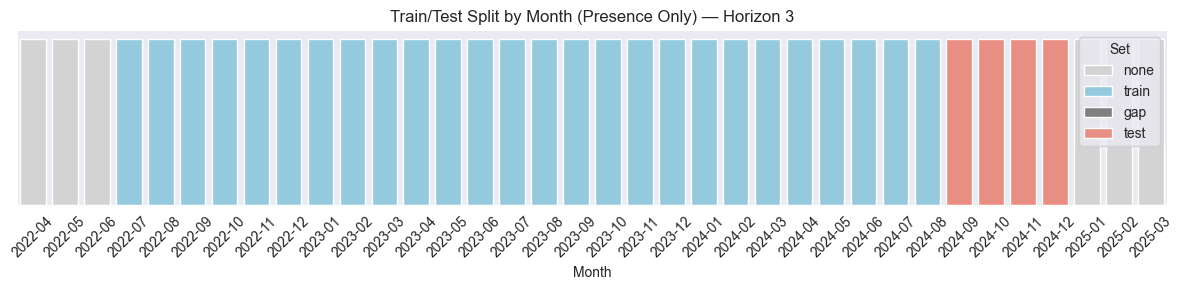

In [377]:
# visualize train/test split by horizon 
HORIZON = 3

visualize_split_presence(splits[HORIZON]['train'], 
                         splits[HORIZON]['test'], label=f'Horizon {HORIZON}')

**TIME SERIES CROSS VALIDATION**

In [378]:
N_SPLITS = 5
VAL_SIZE = 1 
GAP = 0

In [379]:
from sklearn.model_selection import TimeSeriesSplit

def plot_months_per_fold(df, n_splits=5, test_size=2, gap=0):
    # Ensure months are datetime for sorting and plotting
    df['Month'] = pd.to_datetime(df['Month'])
    
    months = df['Month']
    unique_months = sorted(months.unique())

    tscv = TimeSeriesSplit(n_splits=n_splits, test_size=test_size*680, gap=680*gap)
    
    # Map months to integers for plotting
    month_to_num = {m: i for i, m in enumerate(unique_months)}
    num_to_month = {i: m.strftime("%Y-%m") for i, m in enumerate(unique_months)}

    # Prepare plot
    fig, ax = plt.subplots(figsize=(14, 2 * n_splits))

    for fold, (train_idx, test_idx) in enumerate(tscv.split(months)):
        train_months = months.iloc[train_idx].unique()
        test_months = months.iloc[test_idx].unique()
        
        for m in train_months:
            ax.barh(fold, 1, left=month_to_num[m], color='skyblue')
        for m in test_months:
            ax.barh(fold, 1, left=month_to_num[m], color='salmon')

    # Formatting
    ax.set_yticks(range(n_splits))
    ax.set_yticklabels([f'Fold {i+1}' for i in range(n_splits)])
    ax.set_xticks(range(len(unique_months)))
    ax.set_xticklabels([num_to_month[i] for i in range(len(unique_months))], rotation=45, ha='right')
    ax.set_xlabel("Month")
    ax.set_title("Train (blue) and Test (red) Months per Fold")
    plt.tight_layout()
    plt.show()


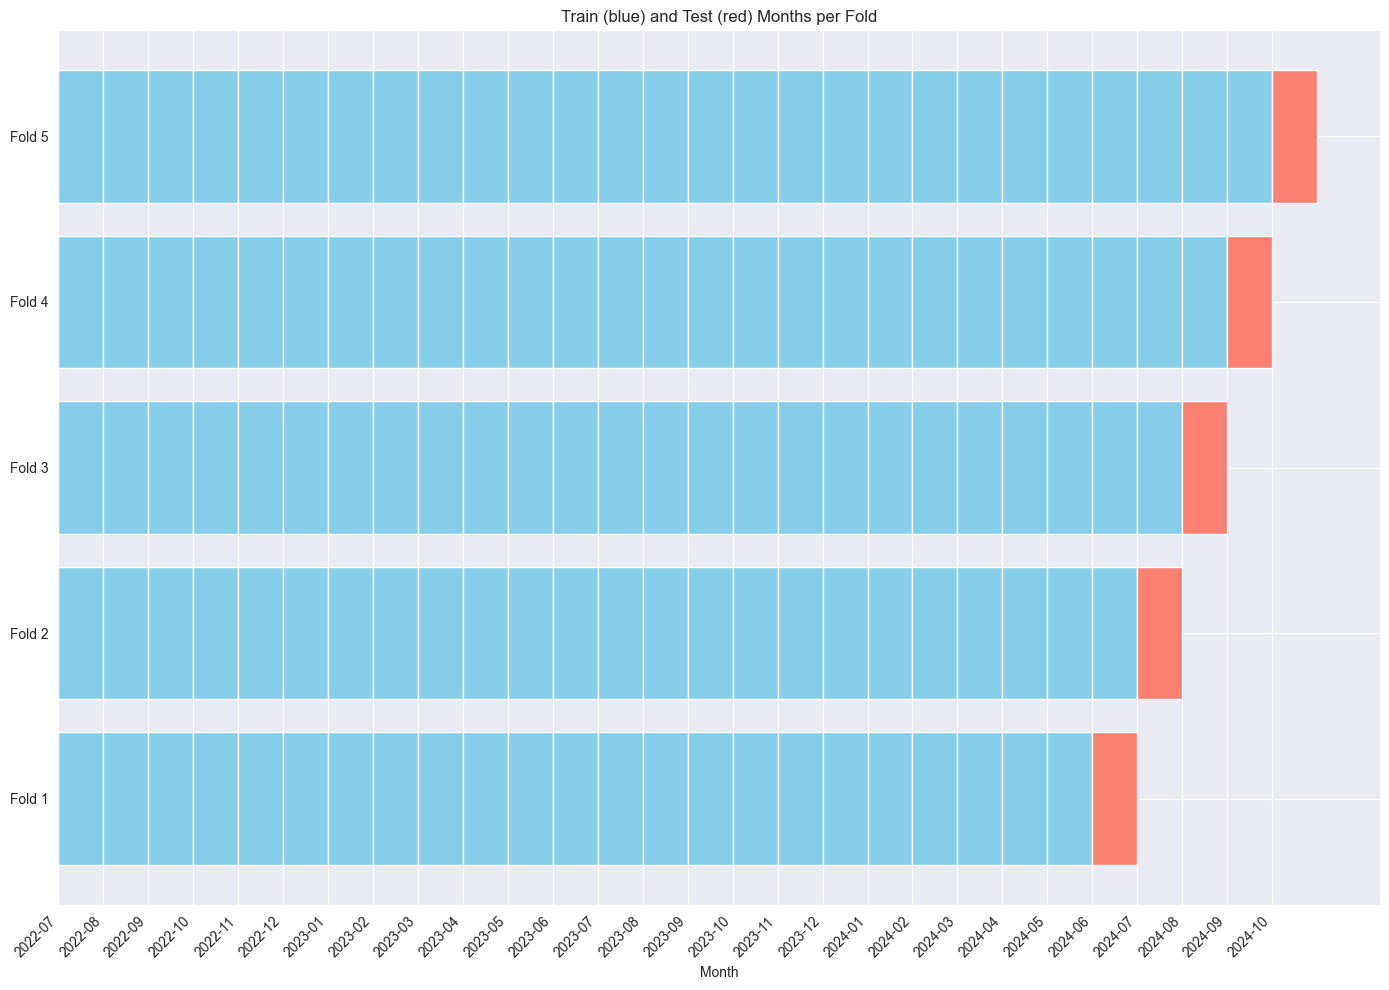

In [380]:
# plot time series cross validation split
HORIZON = 1 
plot_months_per_fold(splits[HORIZON]['train'], n_splits=N_SPLITS, test_size=VAL_SIZE, gap=GAP)


In [381]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
from xgboost import XGBRegressor

def run_time_series_cv(
    df, 
    feature_cols, 
    target_col, 
    params=None, 
    n_splits=5, 
    test_size=2,
    gap=0, 
    verbose=True,
    return_model=False
):
    """
    Run time series cross-validation using XGBoost on panel time series data.

    Returns:
    - (mae, rmse) if return_model=False
    - (last_model, mean_rmse) if return_model=True
    """
    df_sorted = df.sort_values(by=['Month', 'Ward code']).reset_index(drop=True)

    X = df_sorted[feature_cols].copy()
    y = df_sorted[target_col].copy()

    tscv = TimeSeriesSplit(n_splits=n_splits, test_size=test_size*680, gap=gap*680)
    
    mae_list = []
    rmse_list = []
    last_model = None

    if verbose:
        print("\nModel parameters:")
        print(params or "Default")
        print("\nFeature columns:")
        print(feature_cols)

    for fold, (train_idx, test_idx) in enumerate(tscv.split(X)):
        X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]

        model = XGBRegressor(enable_categorical=True, **(params or {}), random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = root_mean_squared_error(y_test, y_pred)

        mae_list.append(mae)
        rmse_list.append(rmse)

        if verbose:
            print(f"Fold {fold + 1}: MAE={mae:.4f}, RMSE={rmse:.4f}")

        last_model = model

    mean_mae = np.mean(mae_list)
    mean_rmse = np.mean(rmse_list)

    if verbose:
        print("\nAverage CV Performance:")
        print(f"Mean MAE:  {mean_mae:.4f}")
        print(f"Mean RMSE: {mean_rmse:.4f}")

    if return_model:
        return last_model, float(mean_rmse)
    else:
        return float(mean_mae), float(mean_rmse)


**PARAMETER TUNING**

Define functions for hyperparameter tuning.

In [382]:
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from xgboost import XGBRegressor
import numpy as np

def tune_time_series(df, param_dist, feature_cols, target_col,
                             n_splits=5, test_size=2, n_iter=10):
    """
    Tunes XGBoost hyperparameters using time series cross-validation (RandomizedSearchCV).

    Returns:
        best_model: Trained best XGBRegressor model.
        best_params: Best hyperparameters.
        mean_rmse: Mean RMSE across all CV folds.
    """
    
    # Sort by time and ward (IMPORTANT) / assumption is that it is already sorted, but just to make sure
    df_sorted = df.sort_values(by=['Month', 'Ward code']).reset_index(drop=True)

    X = df_sorted[feature_cols].copy()
    y = df_sorted[target_col].copy()

    tscv = TimeSeriesSplit(n_splits=n_splits, test_size=test_size*680)

    xgb_model = XGBRegressor(random_state=42, enable_categorical=True)

    search = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=param_dist,
        n_iter=n_iter,
        cv=tscv,
        scoring='neg_mean_squared_error',
        verbose=1,
        random_state=42,
        n_jobs=-1
    )

    search.fit(X, y)

    best_model = search.best_estimator_
    best_params = search.best_params_
    mean_rmse = (-search.best_score_)**0.5
    
    print(f"\n Best model parameters: {best_params}")

    print(f"\nMean RMSE: {mean_rmse:.4f}")

    return best_model, best_params, mean_rmse

In [383]:
# define parameter grid for tuning

param_dist = {
    "n_estimators": [100, 300, 500, 700],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "min_child_weight": [1, 3, 5],
    "gamma": [0, 0.1, 0.3, 0.5],
    "reg_alpha": [0, 0.01, 0.1],
    "reg_lambda": [0, 0.5, 1.0, 2.0]
}

### FEATURE IMPORTANCE AND PRUNING

Define feature importance and pruning functions.

In [384]:
import xgboost as xgb
import matplotlib.pyplot as plt

def plot_feature_importance(model, max_num_features=20):
    """
    Plot feature importance from an XGBoost model.
    """
    fig, ax = plt.subplots(figsize=(10, max_num_features/2))
    xgb.plot_importance(model, importance_type='gain', max_num_features=max_num_features, ax=ax)
    plt.title("XGBoost Feature Importance (Gain)")
    plt.show()


In [385]:
# PRUNE BASED ON IMPORTANCE THRESHOLD

def feature_pruning_by_importance(model, feature_names, threshold=0.01, return_scores=False):
    booster = model.get_booster()
    importance_dict = booster.get_score(importance_type='gain')
    total_gain = sum(importance_dict.values())
    importance_norm = {k: v / total_gain for k, v in importance_dict.items()}
    retained_features = [f for f in feature_names if importance_norm.get(f, 0) >= threshold]
    pruned_count = len(feature_names) - len(retained_features)

    print(f"Pruned {pruned_count} features below gain threshold {threshold}")

    if return_scores:
        return retained_features, importance_norm
    return retained_features


In [386]:
# PRUNE BASED ON KEEPING THE TOP K FEATURES

def feature_pruning_top_k(model, feature_names, top_k=6, return_scores=False):
    booster = model.get_booster()
    importance_dict = booster.get_score(importance_type='gain')
    
    # Fallback for features with zero importance
    for f in feature_names:
        importance_dict.setdefault(f, 0.0)

    sorted_feats = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)
    retained_features = [feat for feat, _ in sorted_feats[:top_k]]

    pruned_count = len(feature_names) - len(retained_features)
    print(f"Pruned {pruned_count} features, retained top {top_k} by gain.")

    if return_scores:
        total_gain = sum(importance_dict.values())
        importance_norm = {k: v / total_gain if total_gain > 0 else 0.0 for k, v in importance_dict.items()}
        return retained_features, importance_norm
    return retained_features


**TRAIN SEPARATE MODELS PER FORECAST HORIZON (1 TO 3 MONTHS AHEAD)**

In [387]:
# define configurations
N_SPLITS = 5
N_VAL_SIZE = 1 
N_ITER_INITIAL = 10
N_ITER_FINAL = 5

In [388]:
# dictionary to store training results per horizon

forecast_models_summary = {
    1: {},
    2: {},
    3: {}}

In [389]:
# function enables a lot of flexibility in the pipeline

def full_pipeline_per_horizon(
    df_train,
    horizon_label,
    feature_cols_all,
    target_col,
    param_dist,
    n_splits=5,
    tscv_gap=0,
    pruning_threshold=0.01,
    top_k=5,
    pruning_method="threshold",  # "threshold" or "topk"
    tuning_iter_initial=5,
    tuning_iter_final=5,
    verbose=True,
    test_size=2,
    tune=False,
    prune=False,
    experiments_df=None,
    include_static=True
):
    from xgboost import XGBRegressor
    from copy import deepcopy
    import pandas as pd

    print(f"\n{'='*30}\nHORIZON {horizon_label}\n{'='*30}")

    print("\n▶ Initial CV with all features:")
    run_time_series_cv(
        df=df_train,
        feature_cols=feature_cols_all,
        target_col=target_col,
        n_splits=n_splits,
        gap=tscv_gap,
        verbose=verbose,
        test_size=test_size
    )

    if tune:
        print("\n▶ Tuning hyperparameters (all features):")
        model_all, params_all, rmse_all = tune_time_series(
            df=df_train,
            param_dist=param_dist,
            feature_cols=feature_cols_all,
            target_col=target_col,
            n_splits=n_splits,
            n_iter=tuning_iter_initial,
            test_size=test_size
        )
        selected_features = feature_cols_all
        model_to_store = model_all
        final_params_to_store = params_all
        final_rmse_to_store = rmse_all

        if prune:
            print(f"\n▶ Pruning features using method: {pruning_method}")
            if pruning_method == "threshold":
                pruned_features = feature_pruning_by_importance(model_all, feature_cols_all, threshold=pruning_threshold)
            elif pruning_method == "topk":
                pruned_features = feature_pruning_top_k(model_all, feature_cols_all, top_k=top_k)
            else:
                raise ValueError("pruning_method must be either 'threshold' or 'topk'")

            print(f"Selected {len(pruned_features)} features")
            if verbose: 
                plot_feature_importance(model_all, max_num_features=25)

            print("\n▶ Final tuning with pruned features:")
            final_model, final_params, final_rmse = tune_time_series(
                df=df_train,
                param_dist=param_dist,
                feature_cols=pruned_features,
                target_col=target_col,
                n_splits=n_splits,
                n_iter=tuning_iter_final,
                test_size=test_size
            )
            selected_features = pruned_features
            model_to_store = final_model
            final_params_to_store = final_params
            final_rmse_to_store = final_rmse

    else:
        print("\n▶ Skipping tuning — evaluating with time series CV:")

        if any(isinstance(v, list) for v in param_dist.values()):
            print("⚠️ Detected search space in param_dist. Using XGBoost defaults instead.")
            model_params = {}
        else:
            model_params = deepcopy(param_dist)

        model_to_store, final_rmse_to_store = run_time_series_cv(
            df=df_train,
            feature_cols=feature_cols_all,
            target_col=target_col,
            params=model_params,
            n_splits=n_splits,
            gap=tscv_gap,
            test_size=test_size,
            verbose=verbose,
            return_model=True
        )
        selected_features = feature_cols_all
        final_params_to_store = model_params

        if prune:
            print(f"\n▶ Pruning features using method: {pruning_method}")
            if pruning_method == "threshold":
                pruned_features = feature_pruning_by_importance(model_to_store, feature_cols_all, threshold=pruning_threshold)
            elif pruning_method == "topk":
                pruned_features = feature_pruning_top_k(model_to_store, feature_cols_all, top_k=top_k)
            else:
                raise ValueError("pruning_method must be either 'threshold' or 'topk'")

            print(f"Selected {len(pruned_features)} features")
            if verbose: 
                plot_feature_importance(model_to_store, max_num_features=25)

            model_to_store, final_rmse_to_store = run_time_series_cv(
                df=df_train,
                feature_cols=pruned_features,
                target_col=target_col,
                params=model_params,
                n_splits=n_splits,
                gap=tscv_gap,
                test_size=test_size,
                verbose=verbose,
                return_model=True
            )
            selected_features = pruned_features

    forecast_models_summary[horizon_label]['model'] = model_to_store
    forecast_models_summary[horizon_label]['params'] = final_params_to_store
    forecast_models_summary[horizon_label]['rmse'] = final_rmse_to_store
    forecast_models_summary[horizon_label]['features'] = selected_features

    if experiments_df is not None:
        experiments_df.loc[len(experiments_df)] = {
            'horizon': horizon_label,
            'rmse': final_rmse_to_store,
            'n_features': len(selected_features),
            'tuned': tune,
            'pruned': prune,
            'pruning_method': pruning_method, 
            'include_static': include_static
        }


In [390]:
# carry out experiments: grid search for tuning yes/no, pruning (either threshold or topk) yes/no, include static yes/no. 

from itertools import product
import pandas as pd

# Initialize experiments_df
experiments_df = pd.DataFrame(columns=['horizon', 'include_static', 'tuned', 'pruned', 'pruning_method', 'n_features', 'rmse'])

# Define option grid
tune_options = [True, False]
prune_options = [True, False]
static_options = [True, False]
pruning_methods = ['threshold', 'topk']  # only used if prune=True

# Loop over all combinations
for tune, prune, include_static in product(tune_options, prune_options, static_options):
    method_list = pruning_methods if prune else [None]  # dummy value when pruning is off

    for pruning_method in method_list:
        for i in range(1, MAX_HORIZON+1):  # horizons 1 to 3
            df_train_i = splits[i]['train']

            feature_cols_all = [col for col in df_train_i.columns if col.startswith(("lag_", "roll_", "month_", "Ward code"))]
            if include_static:
                feature_cols_all += [col for col in df_static_selected.columns if col != "Ward code"]

            full_pipeline_per_horizon(
                df_train=df_train_i,
                horizon_label=i,
                feature_cols_all=feature_cols_all,
                target_col=f'target_t+{i}',
                param_dist=param_dist,
                n_splits=N_SPLITS,
                tuning_iter_initial=N_ITER_INITIAL,
                tuning_iter_final=N_ITER_FINAL,
                test_size=N_VAL_SIZE,
                tune=tune,
                prune=prune,
                pruning_method=pruning_method,
                pruning_threshold=0.1, # if pruning method is threshold, prune features by feature importance threshold
                top_k=5, # if pruning method is topk, prune features by selecting the top 5 features
                experiments_df=experiments_df,
                include_static=include_static,
                verbose=False  # suppress printing
            )

# Save all experiment results to CSV
experiments_df.to_csv("../data/processed/xgboost_experiments_summary.csv", index=False)
print("Saved experiments to '..data/processed/xgboost_experiments_summary.csv'")



HORIZON 1

▶ Initial CV with all features:

▶ Tuning hyperparameters (all features):
Fitting 5 folds for each of 10 candidates, totalling 50 fits

 Best model parameters: {'subsample': 1.0, 'reg_lambda': 1.0, 'reg_alpha': 0.1, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.5, 'colsample_bytree': 1.0}

Mean RMSE: 3.1652

▶ Pruning features using method: threshold
Pruned 27 features below gain threshold 0.1
Selected 4 features

▶ Final tuning with pruned features:
Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Best model parameters: {'subsample': 1.0, 'reg_lambda': 1.0, 'reg_alpha': 0.1, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.5, 'colsample_bytree': 1.0}

Mean RMSE: 3.1721

HORIZON 2

▶ Initial CV with all features:

▶ Tuning hyperparameters (all features):
Fitting 5 folds for each of 10 candidates, totalling 50 fits

 Best model parameters: {'subsample': 1.0, 'reg_lambda'

In [391]:
# view experiment results

experiments_df = pd.read_csv('../data/processed/xgboost_experiments_summary.csv')
experiments_df

horizon  include_static  tuned  pruned pruning_method  n_features  \
0         1            True   True    True      threshold           4   
1         2            True   True    True      threshold           3   
2         3            True   True    True      threshold           4   
3         1            True   True    True           topk           5   
4         2            True   True    True           topk           5   
5         3            True   True    True           topk           5   
6         1           False   True    True      threshold           2   
7         2           False   True    True      threshold           2   
8         3           False   True    True      threshold           2   
9         1           False   True    True           topk           5   
10        2           False   True    True           topk           5   
11        3           False   True    True           topk           5   
12        1            True   True   False            NaN          31   
13        2            True   True   False            NaN          31   
14        3            True   True   False            NaN          31   
15        1           False   True   False            NaN           7   
16        2           False   True   False            NaN           7   
17        3           False   True   False            NaN           7   
18        1            True  False    True      threshold           2   
19        2            True  False    True      threshold           2   
20        3            True  False    True      threshold           2   
21        1            True  False    True           topk           5   
22        2            True  False    True           topk           5   
23        3            True  False    True           topk           5   
24        1           False  False    True      threshold           2   
25        2           False  False    True      threshold           2   
26        3           False  False    True      threshold           2   
27        1           False  False    True           topk           5   
28        2           False  False    True           topk           5   
29        3           False  False    True           topk           5   
30        1            True  False   False            NaN          31   
31        2            True  False   False            NaN          31   
32        3            True  False   False            NaN          31   
33        1           False  False   False            NaN           7   
34        2           False  False   False            NaN           7   
35        3           False  False   False            NaN           7   

        rmse  
0   3.172115  
1   3.168280  
2   3.164583  
3   3.169660  
4   3.162227  
5   3.167000  
6   3.179650  
7   3.170328  
8   3.173150  
9   3.163139  
10  3.189690  
11  3.170725  
12  3.165168  
13  3.187814  
14  3.182020  
15  3.171270  
16  3.190718  
17  3.173655  
18  3.347531  
19  3.197722  
20  3.160700  
21  3.511740  
22  3.535183  
23  3.689698  
24  3.504914  
25  3.541334  
26  3.604432  
27  3.638174  
28  3.696043  
29  3.759023  
30  3.646728  
31  3.763998  
32  3.681276  
33  3.635111  
34  3.695668  
35  3.715041

In [392]:
# view summarized experiment results

# fill all NaNs with 'none'
experiments_df = experiments_df.fillna('none')

# group by config and compute mean RMSE (over the horizons) 
experiments_df.groupby(['tuned', 'pruned', 'pruning_method', 'include_static'])['rmse'].mean().sort_values()

tuned  pruned  pruning_method  include_static
True   True    topk            True              3.166296
               threshold       True              3.168326
                               False             3.174376
               topk            False             3.174518
       False   none            True              3.178334
                               False             3.178548
False  True    threshold       True              3.235318
                               False             3.550227
               topk            True              3.578874
       False   none            False             3.681940
                               True              3.697334
       True    topk            False             3.697747
Name: rmse, dtype: float64


HORIZON 1

▶ Initial CV with all features:

Model parameters:
Default

Feature columns:
['Ward code', 'lag_1', 'lag_2', 'lag_3', 'roll_mean_3', 'month_sin', 'month_cos', 'Index of Multiple Deprivation (IMD) Score', 'Income Score', 'Employment Score', 'Education, Skills and Training Score', 'Health Deprivation and Disability Score', 'Crime Score', 'Barriers to Housing and Services Score', 'Living Environment Score', 'Under 15 years', '15 to 64 years', '65 years and older', 'One-person household', 'One-person household: Aged 66 years and over', 'One-person household: Other', 'Single family household', 'Other household types', 'Detached whole house or bungalow', 'Semi-detached whole house or bungalow', 'Terraced whole house or bungalow', 'Flat, maisonette or apartment', 'A caravan or other mobile or temporary structure', 'Total: All dwellings', 'Unoccupied dwellings', 'stop_count']
Fold 1: MAE=2.8960, RMSE=3.8214
Fold 2: MAE=2.6215, RMSE=3.6844
Fold 3: MAE=2.6210, RMSE=3.6797
Fold 4: MAE

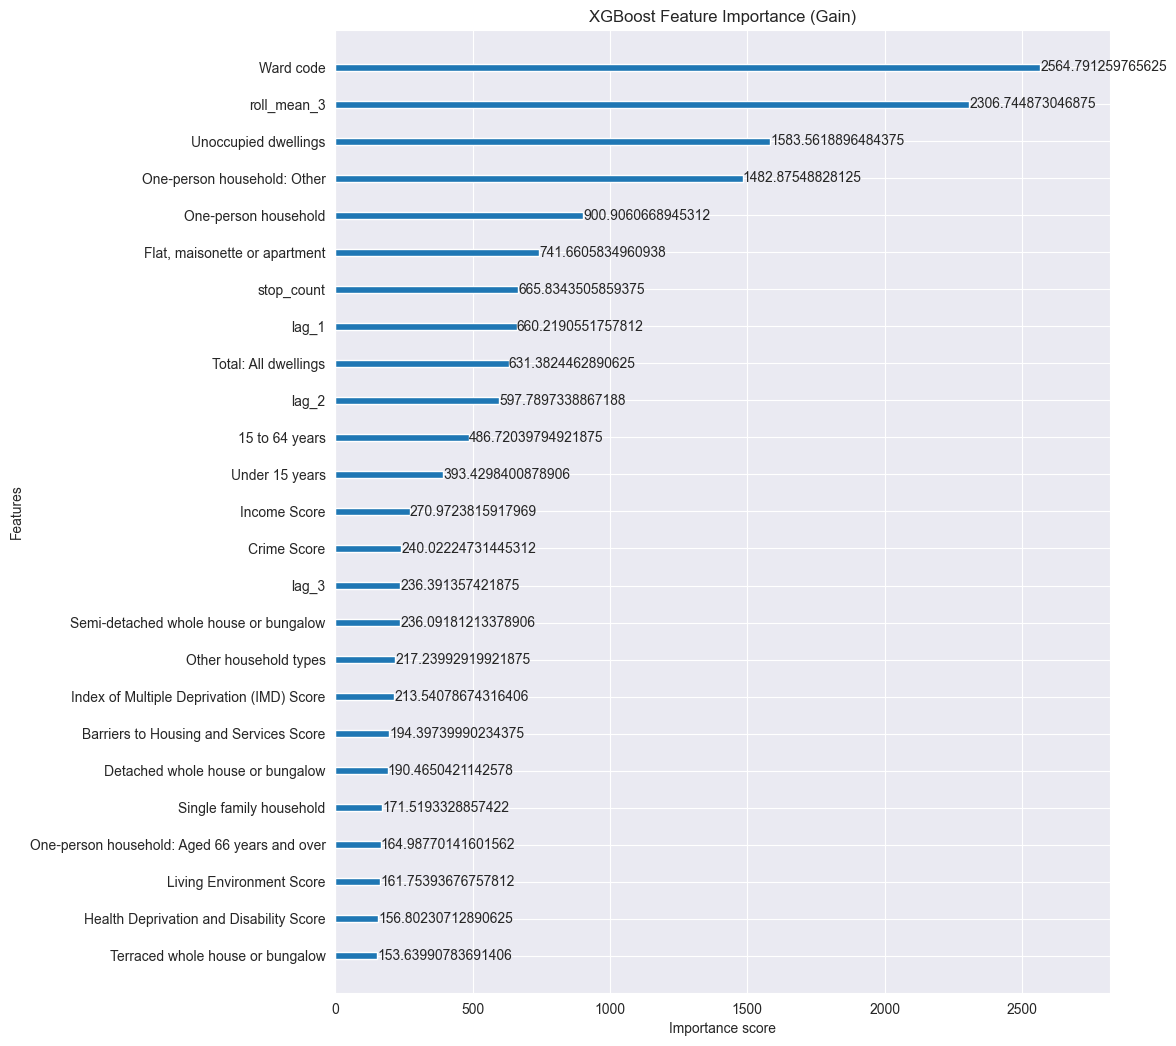


▶ Final tuning with pruned features:
Fitting 5 folds for each of 40 candidates, totalling 200 fits

 Best model parameters: {'subsample': 0.8, 'reg_lambda': 0, 'reg_alpha': 0.01, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.6}

Mean RMSE: 3.1501

HORIZON 2

▶ Initial CV with all features:

Model parameters:
Default

Feature columns:
['Ward code', 'lag_1', 'lag_2', 'lag_3', 'roll_mean_3', 'month_sin', 'month_cos', 'Index of Multiple Deprivation (IMD) Score', 'Income Score', 'Employment Score', 'Education, Skills and Training Score', 'Health Deprivation and Disability Score', 'Crime Score', 'Barriers to Housing and Services Score', 'Living Environment Score', 'Under 15 years', '15 to 64 years', '65 years and older', 'One-person household', 'One-person household: Aged 66 years and over', 'One-person household: Other', 'Single family household', 'Other household types', 'Detached whole house or bungalow', 'Semi-detach

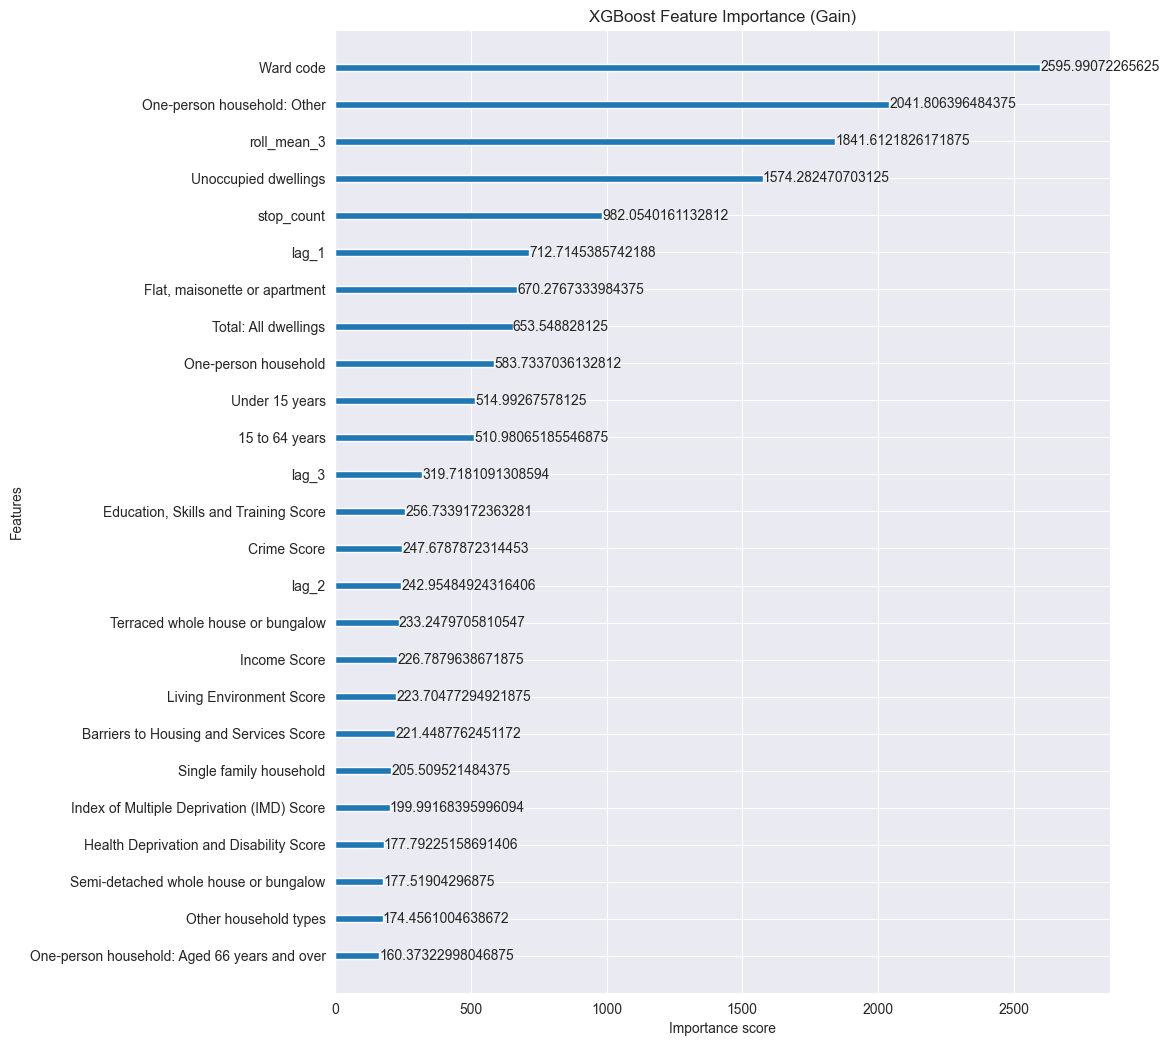


▶ Final tuning with pruned features:
Fitting 5 folds for each of 40 candidates, totalling 200 fits

 Best model parameters: {'subsample': 0.8, 'reg_lambda': 0, 'reg_alpha': 0.01, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.6}

Mean RMSE: 3.1421

HORIZON 3

▶ Initial CV with all features:

Model parameters:
Default

Feature columns:
['Ward code', 'lag_1', 'lag_2', 'lag_3', 'roll_mean_3', 'month_sin', 'month_cos', 'Index of Multiple Deprivation (IMD) Score', 'Income Score', 'Employment Score', 'Education, Skills and Training Score', 'Health Deprivation and Disability Score', 'Crime Score', 'Barriers to Housing and Services Score', 'Living Environment Score', 'Under 15 years', '15 to 64 years', '65 years and older', 'One-person household', 'One-person household: Aged 66 years and over', 'One-person household: Other', 'Single family household', 'Other household types', 'Detached whole house or bungalow', 'Semi-detach

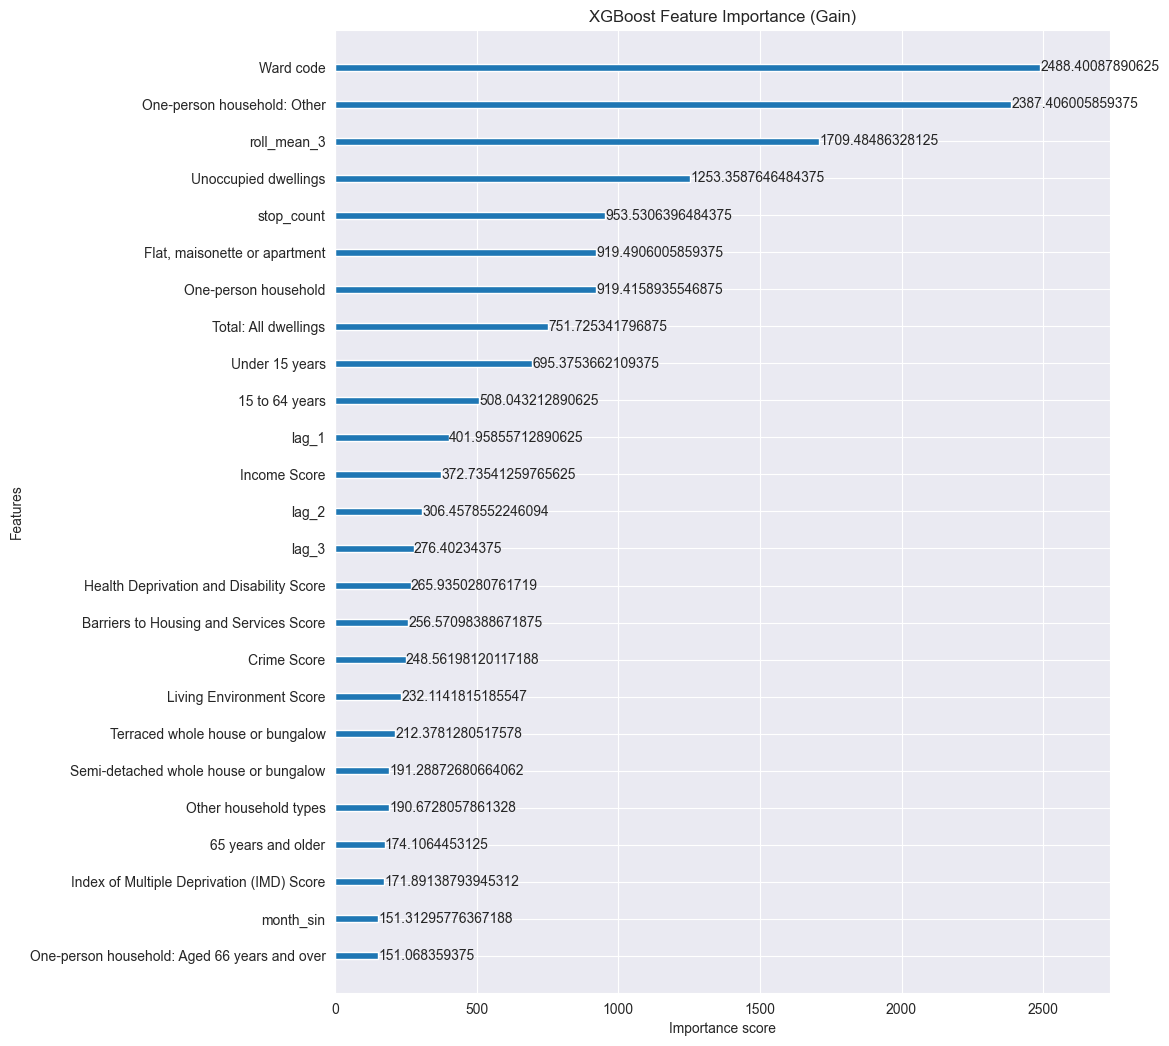


▶ Final tuning with pruned features:
Fitting 5 folds for each of 40 candidates, totalling 200 fits

 Best model parameters: {'subsample': 0.8, 'reg_lambda': 0, 'reg_alpha': 0.01, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.6}

Mean RMSE: 3.1561


In [412]:
# FINAL RUN WITH BEST CV RESULTS

# TODO: RUN AGAIN

# parameters
INCLUDE_STATIC = True
PRUNING_METHOD = 'topk' # or threshold
TOP_K = 5
TUNE = True
PRUNE = True

# run more extensively 
N_ITER_INITIAL = 40
N_ITER_FINAL = 40


for i in range(1, MAX_HORIZON+1):  # horizons 0 to 4
    df_train_i = splits[i]['train']

    feature_cols_all = [col for col in df_train_i.columns if col.startswith(("lag_", "roll_", "month_", "Ward code"))]
    if INCLUDE_STATIC:
        feature_cols_all += [col for col in df_static_selected.columns if col != "Ward code"]

    full_pipeline_per_horizon(
        df_train=df_train_i,
        horizon_label=i,
        feature_cols_all=feature_cols_all,
        target_col=f'target_t+{i}',
        param_dist=param_dist,
        n_splits=N_SPLITS,
        tuning_iter_initial=N_ITER_INITIAL,
        tuning_iter_final=N_ITER_FINAL,
        test_size=N_VAL_SIZE,
        tune=TUNE,    
        prune=PRUNE,    
        pruning_method=PRUNING_METHOD, 
        top_k=TOP_K,
        experiments_df=None, 
        include_static = INCLUDE_STATIC
    )



**PER-HORIZON EVALUATION**

Define functions for evaluation. 

In [426]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

def evaluate_on_test(forecast_models_summary, splits):
    results = {}

    for i in range(1, MAX_HORIZON+1): # i = 1 to 3
        target_col = f"target_t+{i}"

        model = forecast_models_summary[i]['model']
        features = forecast_models_summary[i]['features']
        test_df = splits[i]["test"]

        y_true = test_df[target_col]
        y_pred = model.predict(test_df[features])

        mae = mean_absolute_error(y_true, y_pred)
        rmse = root_mean_squared_error(y_true, y_pred)

        results[i] = {"mae": mae, "rmse": rmse}

    return results


In [427]:
import numpy as np
import pandas as pd

def predict_test_set(splits, forecast_models_summary):
    """
    Applies trained models to their respective test sets and returns predictions
    with both:
    - feature_datetime: the time the features are based on
    - target_datetime: the actual month being predicted (shifted forward by horizon)

    Also includes:
    - y_pred_rounded: rounded-up prediction to reflect discrete crime counts.
    """
    results = {}

    for horizon, split in splits.items():
        model = forecast_models_summary[horizon]['model']
        features = forecast_models_summary[horizon]['features']
        test = split['test'].copy()
        
        # Feature datetime = when features are constructed
        test['feature_datetime'] = test['Month']

        # Target datetime = when the crime count is predicted for
        test['target_datetime'] = test['Month'] + pd.DateOffset(months=horizon)

        X_test = test[features]
        y_test = test[f'target_t+{horizon}']
        y_pred = model.predict(X_test)
        
        # Round up predictions to reflect discrete count nature
        y_pred_rounded = np.ceil(y_pred).astype(int)

        results[horizon] = pd.DataFrame({
            'ward': test['Ward code'],
            'feature_datetime': test['feature_datetime'],
            'target_datetime': test['target_datetime'],
            'y_true': y_test,
            'y_pred': y_pred,
            'y_pred_rounded': y_pred_rounded
        })

    return results


In [428]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
import numpy as np

def compute_metrics(predictions_by_horizon):
    """
    Computes MAE and RMSE for each forecast horizon.
    """
    metrics = {}
    for horizon, df in predictions_by_horizon.items():
        mae = mean_absolute_error(df['y_true'], df['y_pred'])
        rmse = root_mean_squared_error(df['y_true'], df['y_pred'])
        metrics[horizon] = {'mae': mae, 'rmse': rmse}
    return metrics


In [429]:
def plot_predictions_vs_actual(horizon, ward, df):
    """
    Plots predicted vs actual crime counts for a single ward and forecast horizon.
    Y-axis starts at 0 and upper bound is padded dynamically based on data.
    """
    ward_df = df[df['ward'] == ward].sort_values('target_datetime')

    plt.figure(figsize=(10, 5))
    plt.plot(ward_df['target_datetime'], ward_df['y_true'], label='Actual', marker='o')
    plt.plot(ward_df['target_datetime'], ward_df['y_pred_rounded'], label='Predicted', marker='x')

    max_val = max(ward_df['y_true'].max(), ward_df['y_pred_rounded'].max())
    plt.ylim(bottom=0, top=max_val * 1.2)  # pad 20% above highest value

    plt.title(f'Ward {ward} – Horizon {horizon}')
    plt.xlabel('Month (Prediction Target)')
    plt.ylabel('Crime Count')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [430]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_deployment_timeline_for_ward(
    ward, splits, forecast_models_summary, predictions_dict,
    max_horizon=4, save_path=None
):
    """
    Plots the actual training data (black line), in-sample fitted values (dotted lines),
    and future predictions (scatter) across forecast horizons for a single ward.

    Parameters:
        ward (str): Ward code.
        splits (dict): Dictionary with train/test splits keyed by horizon.
        forecast_models_summary (dict): Model info per horizon.
        predictions_dict (dict): Prediction outputs per horizon.
        max_horizon (int): Max forecast horizon (e.g., 3 or 4).
        save_path (str, optional): If provided, saves the figure to this path.
    """
    plt.figure(figsize=(14, 6))

    # 1. Actual training data (from horizon 1 only)
    train_df = splits[1]['train']
    ward_train = train_df[train_df['Ward code'] == ward].copy()
    actual_dates = ward_train['Month']
    actual_values = ward_train['target_t+1']
    plt.plot(actual_dates, actual_values, color='black', label='Actual (training)', linewidth=2)

    # Color map for horizons
    horizon_colors = ['red', 'orange', 'green', 'blue', 'purple']
    shown_future_label = False  # Ensure "Actual (future)" appears only once

    # 2. In-sample fitted values
    for h in range(1, max_horizon + 1):
        model = forecast_models_summary[h]['model']
        features = forecast_models_summary[h]['features']
        train_h = splits[h]['train']
        ward_train_h = train_h[train_h['Ward code'] == ward].copy()
        if ward_train_h.empty:
            continue
        X_train_h = ward_train_h[features]
        y_fitted = model.predict(X_train_h)
        fitted_dates = ward_train_h['Month'] + pd.DateOffset(months=h)
        plt.plot(
            fitted_dates, y_fitted,
            linestyle='--',
            label=f'In-sample fit t+{h}',
            alpha=0.6,
            color=horizon_colors[h]
        )

    # 3. Training cutoff date
    cutoff = max(
        splits[h]['train'][splits[h]['train']['Ward code'] == ward]['Month'].max() + pd.DateOffset(months=h)
        for h in range(1, max_horizon + 1)
    )
    plt.axvline(cutoff, color='gray', linestyle=':', linewidth=1.2, label='Training cutoff')

    # 4. Forecast scatter points
    for h in range(1, max_horizon + 1):
        pred_df = predictions_dict[h]
        ward_preds = pred_df[pred_df['ward'] == ward].copy()
        forecast_month = cutoff + pd.DateOffset(months=h)
        point = ward_preds[ward_preds['target_datetime'] == forecast_month]

        if not point.empty:
            assert len(point) == 1, f"Expected one row for ward={ward}, horizon={h}, month={forecast_month}, got {len(point)}"
            y_true = point['y_true'].values[0]
            y_pred = point['y_pred'].values[0]

            # Plot actual future value (only once in legend)
            if not shown_future_label:
                plt.scatter(forecast_month, y_true, color='black', marker='o', label='Actual (future)')
                shown_future_label = True
            else:
                plt.scatter(forecast_month, y_true, color='black', marker='o')

            # Plot predicted value
            plt.scatter(forecast_month, y_pred, color=horizon_colors[h], marker='x', label=f'Predicted t+{h}')

    plt.title(f'Deployment-style forecast timeline for Ward {ward}')
    plt.xlabel('Month')
    plt.ylabel('Crime Count')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300)
        print(f"Plot saved to {save_path}")
    else:
        plt.show()


In [431]:
predictions_by_horizon = predict_test_set(splits, forecast_models_summary)
predictions_by_horizon

{1:            ward feature_datetime target_datetime  y_true     y_pred  \
 0     E05009317       2024-11-01      2024-12-01    16.0  11.493471   
 1     E05009318       2024-11-01      2024-12-01    16.0   8.033175   
 2     E05009319       2024-11-01      2024-12-01    10.0  13.508067   
 3     E05009320       2024-11-01      2024-12-01     4.0   7.865599   
 4     E05009321       2024-11-01      2024-12-01    12.0   4.944235   
 ...         ...              ...             ...     ...        ...   
 2715  E05014116       2025-02-01      2025-03-01     2.0   3.083937   
 2716  E05014117       2025-02-01      2025-03-01     7.0   5.333222   
 2717  E05014118       2025-02-01      2025-03-01    18.0  12.755486   
 2718  E05014119       2025-02-01      2025-03-01     2.0   3.837763   
 2719  E09000001       2025-02-01      2025-03-01    28.0  25.269178   
 
       y_pred_rounded  
 0                 12  
 1                  9  
 2                 14  
 3                  8  
 4         

In [432]:
compute_metrics(predictions_by_horizon)

{1: {'mae': 2.4462931347682195, 'rmse': 3.228264166815163},
 2: {'mae': 2.4677302420577583, 'rmse': 3.260230956856018},
 3: {'mae': 2.4828212779234438, 'rmse': 3.2874898073821424}}

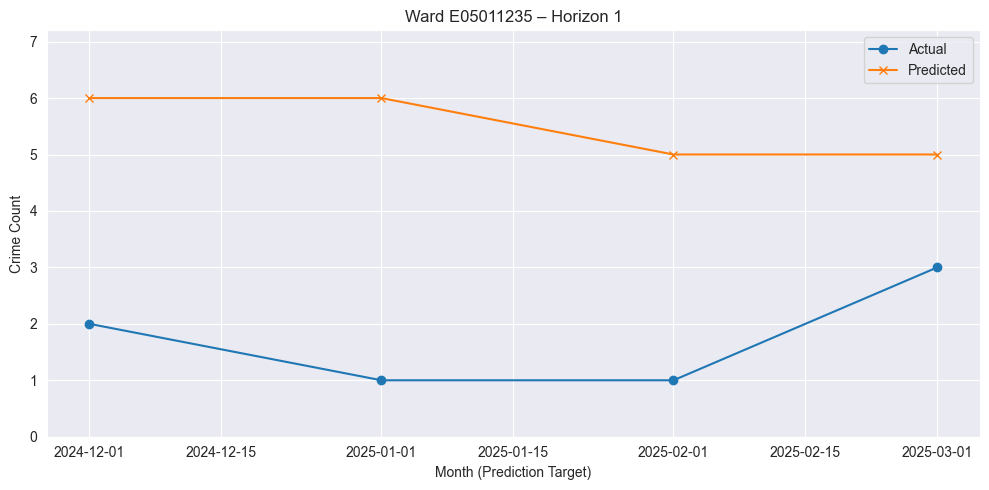

In [433]:
# PREDICTION BY HORIZON

HORIZON = 1
ward_to_plot = df_burglaries["Ward code"].unique()[100]
plot_predictions_vs_actual(horizon=HORIZON, ward=ward_to_plot, df=predictions_by_horizon[HORIZON])

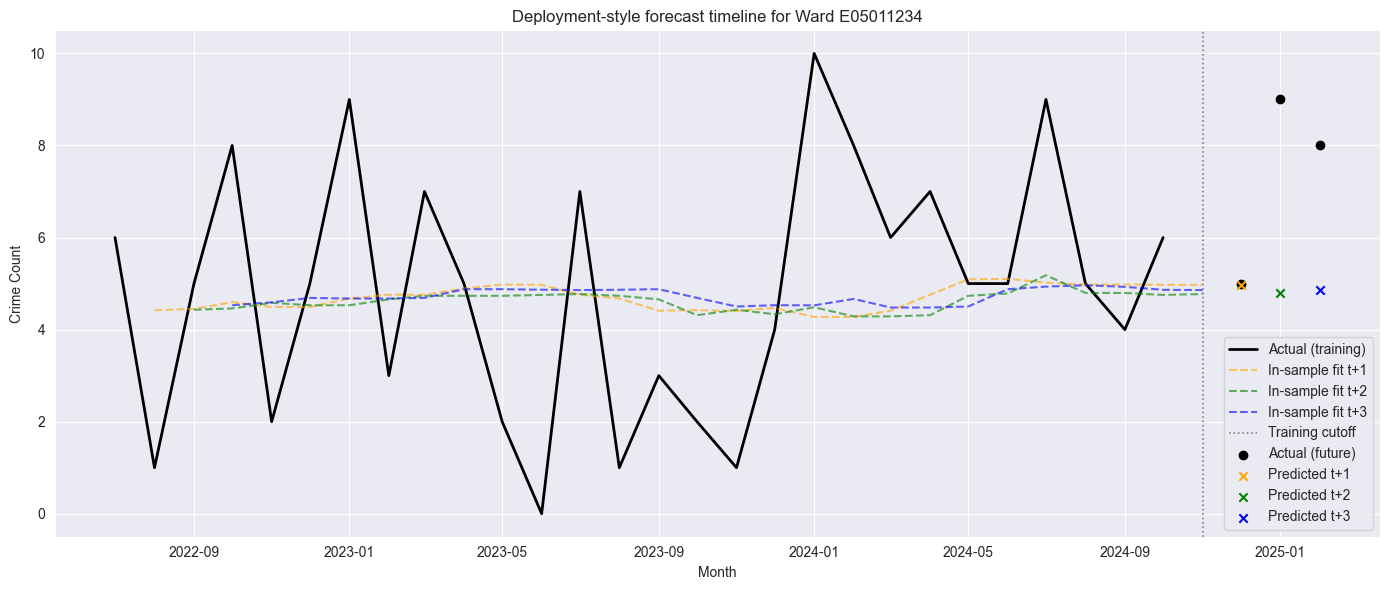

In [434]:
ward_to_plot = df_burglaries["Ward code"].unique()[99]

plot_deployment_timeline_for_ward(
    ward=ward_to_plot,  # or any other ward code
    splits=splits,
    forecast_models_summary=forecast_models_summary,
    predictions_dict=predictions_by_horizon,
    max_horizon=3
)


**DEPLOYMENT: COMBINE FORECASTS FOR FINAL USE**

In [435]:
import pandas as pd
import numpy as np

def create_latest_feature_snapshot(df_burglaries, df_static, lags=[1, 2, 3], rolling_windows=[2, 4, 6]):
    """
    Prepares the latest available feature snapshot per ward for inference.
    Returns a DataFrame with one row per ward and feature columns (no target).
    """

    # Copy and preprocess
    df = df_burglaries.copy()
    df['Month'] = pd.to_datetime(df['Month'])
    df = df.sort_values(['Ward code', 'Month'])

    # Create a full range of months
    all_months = pd.date_range(start=df['Month'].min(), end=df['Month'].max(), freq='MS')

    # Generate time-series features for each ward
    features = []
    for ward, group in df.groupby('Ward code'):
        group = group.set_index('Month').sort_index()
        group = group.reindex(all_months, fill_value=0)
        group['Ward code'] = ward

        for lag in lags:
            group[f'lag_{lag}'] = group['Crime count'].shift(lag)
        for window in rolling_windows:
            group[f'roll_mean_{window}'] = group['Crime count'].shift(1).rolling(window=window).mean()

        group = group.reset_index().rename(columns={'index': 'Month'})
        features.append(group)

    df_features = pd.concat(features, ignore_index=True)

    # Add cyclical month features
    df_features['month'] = df_features['Month'].dt.month
    df_features['month_sin'] = np.sin(2 * np.pi * df_features['month'] / 12)
    df_features['month_cos'] = np.cos(2 * np.pi * df_features['month'] / 12)
    df_features = df_features.drop(columns=['month'])

    # Merge static ward-level features
    df_features = df_features.merge(df_static, on='Ward code', how='left')

    # Take latest row per ward (most recent Month)
    latest_snapshot = (
        df_features.sort_values("Month")
        .groupby("Ward code")
        .tail(1)
        .reset_index(drop=True)
    )

    latest_snapshot['Ward code'] = latest_snapshot['Ward code'].astype('category')

    # Drop 'Crime count' and 'Month' if needed for clean prediction input
    return latest_snapshot


In [436]:
def create_combined_forecasts(df_burglaries, df_static, forecast_models_summary, lags=[1, 2, 3], rolling_windows=[2, 4, 6], max_horizon=4):
    """
    For the latest available data, create features snapshot and generate predictions
    across horizons 0 to max_horizon using provided forecast_models_summary.
    Returns a DataFrame with:
     - Month (time of prediction)
     - Ward code
     - Predictions for each horizon (pred_h0, pred_h1, ...)
    """
    latest_features = create_latest_feature_snapshot(df_burglaries, df_static, lags=lags, rolling_windows=rolling_windows)

    # Time of prediction is the Month of the latest snapshot rows (same for all wards)
    prediction_month = latest_features['Month'].max()

    results = pd.DataFrame({
        'Month': prediction_month,
        'Ward code': latest_features['Ward code']
    })

    # Predict for each horizon
    for h in range(1, max_horizon + 1):
        model = forecast_models_summary[h]['model']
        features = forecast_models_summary[h]['features']

        # Select features for prediction
        X_pred = latest_features[features]

        # Predict and add to results
        preds = model.predict(X_pred)
        results[f'pred_h{h}'] = preds

    # Ensure Ward code stays categorical if needed
    results['Ward code'] = results['Ward code'].astype('category')

    return results


In [437]:
forecasts = create_combined_forecasts(df_burglaries, df_static_selected, forecast_models_summary, lags=[1, 2, 3], rolling_windows=[3], max_horizon=3)
forecasts

Month  Ward code    pred_h1    pred_h2    pred_h3
0   2025-03-01  E05014110   4.419265   4.476385   4.595229
1   2025-03-01  E05014102   9.504903   9.813963   9.845197
2   2025-03-01  E05014114   5.715454   5.810739   5.934775
3   2025-03-01  E05014103   4.255009   4.126223   4.009344
4   2025-03-01  E05014107   3.926273   3.908648   3.842516
..         ...        ...        ...        ...        ...
675 2025-03-01  E05013785   4.944168   4.932483   5.015297
676 2025-03-01  E05013784   4.645812   4.703127   4.461020
677 2025-03-01  E05013783   6.530545   6.447963   6.651475
678 2025-03-01  E05013781   4.577980   4.344924   4.457514
679 2025-03-01  E09000001  26.749765  26.474287  27.075199

[680 rows x 5 columns]